# data 불러오기
- import version 설정(터미널에서 지정)
    * pip install scikit-learn==1.1
    * pip install imbalanced-learn==0.9



## data 확인
데이터 출처: Kaggle
https://www.kaggle.com/code/joshuaswords/awesome-hr-data-visualization-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.ticker as mtick

# To ensure text placement and advanced grid layout
from matplotlib.gridspec import GridSpec

In [2]:
# aug_test에는 target값이 없어서 aug_train만 사용할 예정
## 그리고 aug_train에서 train, validation, test set을 6:2:2로 나눌 예정
aug_train = pd.read_csv('data/aug_train.csv')

In [3]:
aug_train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
aug_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [5]:
aug_train.shape

(19158, 14)

### 결측치 확인
결측치가 꽤나 많은데 다 살리는 방향으로 갈 거다.
- enrollee_id                  0
- city                         0
- city_development_index       0
- gender                    4508
- relevent_experience          0
- enrolled_university        386
- education_level            460
- major_discipline          2813
- experience                  65
- company_size              5938
- company_type              6140
- last_new_job               423
- training_hours               0
- target                       0

In [6]:
aug_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
# Check for nulls : 결측치 비율 확인
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [8]:
# 결측치가 아예 없었던 데이터 10203개
# aug_train[aug_train.isnull().any(axis=1)]
aug_train.isna().sum(axis=1).astype(bool).sum()

10203

### 실수형, 문자형 변수

In [9]:
## 실수형, 문자형 변수
var_num = aug_train.select_dtypes(include=['float', 'int']).columns
var_obj = aug_train.select_dtypes(include=['object']).columns

print('features with dtype float : ', len(var_num),'개')
print(var_num)
print('features with dtype object : ', len(var_obj),'개')
print(var_obj)

features with dtype float :  4 개
Index(['enrollee_id', 'city_development_index', 'training_hours', 'target'], dtype='object')
features with dtype object :  10 개
Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [10]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

#### 실수형 변수
- 실수형 변수들은 결측치가 없다!

In [11]:
group_num.isna().sum()

enrollee_id               0
city_development_index    0
training_hours            0
target                    0
dtype: int64

#### 범주형 자료 : categorical data 정리

In [12]:
group_obj.isna().sum()

city                      0
gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
dtype: int64

##### city
- city별로 one unique한 city_development_index 값을 가지기 때문에 city는 제거한다.

In [13]:
# Group by 'city' and calculate the number of unique 'city_development_index' values
unique_development_index_counts = aug_train.groupby('city')['city_development_index'].nunique().reset_index()

# Check if any city has more than one unique city_development_index value
cities_with_multiple_development_indices = unique_development_index_counts[unique_development_index_counts['city_development_index'] > 1]

# Display the results
print(f"Cities with more than one unique 'city_development_index':\n{cities_with_multiple_development_indices}")

# Display the unique counts for all cities
print(f"\nUnique 'city_development_index' counts for all cities:\n{unique_development_index_counts}")

Cities with more than one unique 'city_development_index':
Empty DataFrame
Columns: [city, city_development_index]
Index: []

Unique 'city_development_index' counts for all cities:
         city  city_development_index
0      city_1                       1
1     city_10                       1
2    city_100                       1
3    city_101                       1
4    city_102                       1
..        ...                     ...
118   city_93                       1
119   city_94                       1
120   city_97                       1
121   city_98                       1
122   city_99                       1

[123 rows x 2 columns]


In [14]:
aug_train['city'].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [15]:
aug_train.drop(columns=['city'],inplace=True)

##### last_new_job 변수
결측치 처리 방법
1. (aug_train['company_type'].isna()) & (aug_train['company_size'].isna()) 조건에 맞는 행의 'last_new_job'을 'never'로 채움
    - never의 의미는 한 번도 직장을 구해보지 않았다는 의미다.
2. 이후의 남은 결측치는 NaN       230 => Unknown으로 채울 것

In [16]:
aug_train[(aug_train['company_type'].isna())&(aug_train['company_size'].isna())]['last_new_job'].value_counts(dropna=False)

1        2006
never    1518
>4        685
2         594
NaN       193
4         191
3         173
Name: last_new_job, dtype: int64

In [17]:
# 필터링 조건에 맞는 행의 'last_new_job'을 'never'로 채움
mask = (aug_train['company_type'].isna()) & (aug_train['company_size'].isna())
aug_train.loc[mask, 'last_new_job'] = aug_train.loc[mask, 'last_new_job'].fillna('never')

In [18]:
aug_train[(aug_train['company_type'].isna())&(aug_train['company_size'].isna())]['last_new_job'].value_counts(dropna=False)

1        2006
never    1711
>4        685
2         594
4         191
3         173
Name: last_new_job, dtype: int64

In [19]:
aug_train['last_new_job'].value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2645
4        1029
3        1024
NaN       230
Name: last_new_job, dtype: int64

- NaN 230개는 나중에 experience 결측치 처리할 때 다시 보기

In [20]:
aug_train['last_new_job'].fillna('Unknown',inplace=True)

In [21]:
### 보기 좋게만 만들기
aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer


In [22]:
aug_train['last_new_job'].value_counts(dropna=False)

1          8040
>4         3290
2          2900
Never      2645
4          1029
3          1024
Unknown     230
Name: last_new_job, dtype: int64

##### experience 변수
1. 변수 value 값 처리
    - x: '0' if x == '<1' else x
        - 대신, 'experience' 열을 기준으로 'experience_under_1' 열 생성
    - x: '0' if x == '>20' else x
        - 대신, 'experience' 열을 기준으로 'experience_over_20' 열 생성
2. 결측치 : NaN      65개 발생
    - 'experience' 열을 기준으로 x가 결측치면 1, 아니면 0으로 'experience_Unknown' 열 생성
    - 'experience' 열에서 결측치는 '0'으로 대체


In [23]:
aug_train['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [24]:
# 'experience' 열을 기준으로 'experience_under_1' 열 생성
aug_train['experience_under_1'] = aug_train['experience'].apply(lambda x: 1 if x == '<1' else 0)

# 'experience' 열을 기준으로 'experience_over_20' 열 생성
aug_train['experience_over_20'] = aug_train['experience'].apply(lambda x: 1 if x == '>20' else 0)

In [25]:
aug_train[aug_train['experience']=='0']['experience_over_20'].value_counts()

Series([], Name: experience_over_20, dtype: int64)

In [26]:
aug_train[aug_train['experience']=='0']['experience_under_1'].value_counts()

Series([], Name: experience_under_1, dtype: int64)

In [27]:
aug_train['experience_over_20'].value_counts()

0    15872
1     3286
Name: experience_over_20, dtype: int64

In [28]:
aug_train['experience_under_1'].value_counts()

0    18636
1      522
Name: experience_under_1, dtype: int64

In [29]:
# 'experience' 열에서 '<1'을 '0'으로 대체
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)

# 'experience' 열에서 '>20'을 '0'으로 대체
aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '>20' else x)

In [30]:
# 'experience' 열을 기준으로 x가 결측치면 1, 아니면 0으로 'experience_Unknown' 열 생성
aug_train['experience_Unknown'] = aug_train['experience'].apply(lambda x: 1 if pd.isna(x) else 0)

# 'experience' 열에서 결측치는 '0'으로 대체
aug_train['experience'] = aug_train['experience'].fillna('0')

In [31]:
aug_train['experience'].value_counts(dropna=False)

0     3873
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

In [32]:
aug_train['experience_Unknown'].value_counts(dropna=False)

0    19093
1       65
Name: experience_Unknown, dtype: int64

##### company 변수
###### company_size 변수 
- 결측치 :NaN          5938 개,
###### company_type 변수 
- 결측치 :NaN                    6140개,
1. (1711개) company 변수 둘 다 결측치가 있고, last_new_job ='never'인 경우에는 company_type, company_size 둘 다 'Unemployed'
    - last_new_job : 이전 직업과 현재 직업의 몇 년 차이
    - 앞으로 다닐 회사가 아니라, last_new_job가 'never'인 즉, 이전회사가 없었던 얘들은 unemployed 된 애들이라고 생각함

2. 나머지는 'Unknown'으로 만들기
- aug_train['company_size'].fillna('Unknown',inplace=True)
- aug_train['company_type'].fillna('Unknown',inplace=True)
    - 결측치 겹치는 개 : 5360개 -> 얘네는 last_new_job과는 공통점이 없다.
    - company 정보가 현재 회사를 다니고 있고, 회사를 다니는 중에 교육을 받는다.

In [33]:
aug_train['company_size'].value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [34]:
aug_train['company_type'].value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [35]:
aug_train[(aug_train['last_new_job']=='Never')&(aug_train['company_size'].isna())]['company_type'].value_counts(dropna=False)

NaN                    1711
Pvt Ltd                 246
Public Sector            12
Other                     3
NGO                       2
Early Stage Startup       1
Name: company_type, dtype: int64

In [36]:
aug_train[(aug_train['last_new_job']=='Never')&(aug_train['company_type'].isna())]['company_size'].value_counts(dropna=False)

NaN          1711
50-99          17
100-500        17
500-999        10
10/49           9
10000+          8
<10             6
1000-4999       6
5000-9999       4
Name: company_size, dtype: int64

* Last_new_job이 never이면서 company size가 결측인게 없음
* 마찬가지로 last_new_job이 never이면서 company_type이 결측인게 없음

In [37]:
# 필터링 조건 정의
mask = (aug_train['last_new_job']=='Never')&(aug_train['company_type'].isna())

# 'company_size'의 NaN 값을 'Unemployed'으로 채움
aug_train.loc[mask, 'company_size'] = aug_train.loc[mask, 'company_size'].fillna('Unemployed')

# 필터링 조건 정의
mask = (aug_train['last_new_job']=='Never')&(aug_train['company_size']=='Unemployed')
# 'company_type'의 NaN 값을 'Unemployed'으로 채움
aug_train.loc[mask, 'company_type'] = aug_train.loc[mask, 'company_type'].fillna('Unemployed')


In [38]:
print(aug_train['company_type'].value_counts(dropna=False))
print(aug_train['company_size'].value_counts(dropna=False))

Pvt Ltd                9817
NaN                    4429
Unemployed             1711
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
NaN           4227
50-99         3083
100-500       2571
10000+        2019
Unemployed    1711
10/49         1471
1000-4999     1328
<10           1308
500-999        877
5000-9999      563
Name: company_size, dtype: int64


In [39]:
# company_size 0으로 처리하는 걸로 바꿈.
aug_train['company_size'].fillna('0',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)

In [40]:
### 보기 좋게만 만들기
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

In [41]:
print(aug_train['company_type'].value_counts(dropna=False))
print(aug_train['company_size'].value_counts(dropna=False))

Pvt Ltd                9817
Unknown                4429
Unemployed             1711
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
0             4227
50-99         3083
100-500       2571
10000+        2019
Unemployed    1711
10-49         1471
1000-4999     1328
<10           1308
500-999        877
5000-9999      563
Name: company_size, dtype: int64


##### Gender variable
- 결측치와 Other이랑 합친다.

In [42]:
aug_train['gender'].fillna('Not provided',inplace=True)

In [43]:
aug_train['gender'].value_counts(dropna=False)

Male            13221
Not provided     4508
Female           1238
Other             191
Name: gender, dtype: int64

In [44]:
# 필터링 조건 수정: 'Not provided' 또는 'Other'
aug_train_gender = aug_train[(aug_train['gender'] == 'Not provided') | (aug_train['gender'] == 'Other')]
aug_train_gender['gender'].value_counts()

Not provided    4508
Other            191
Name: gender, dtype: int64

In [45]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

##### genderd의 'other'와 'not provided'의 분포 비교

수치형 데이터 시각화


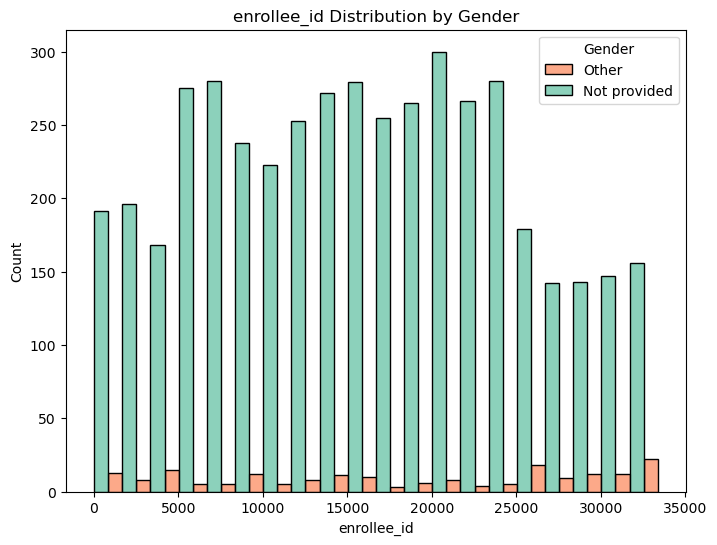

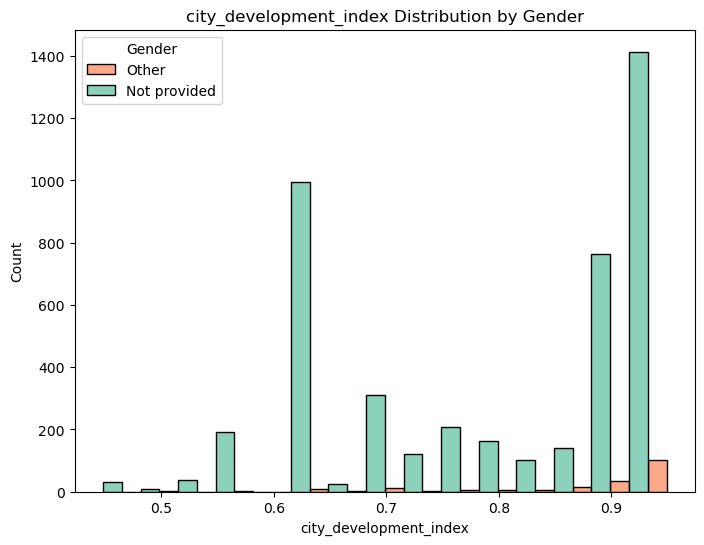

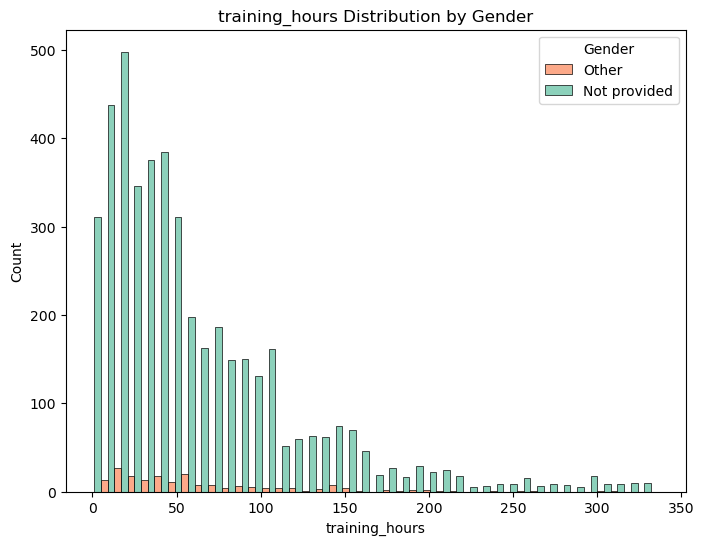

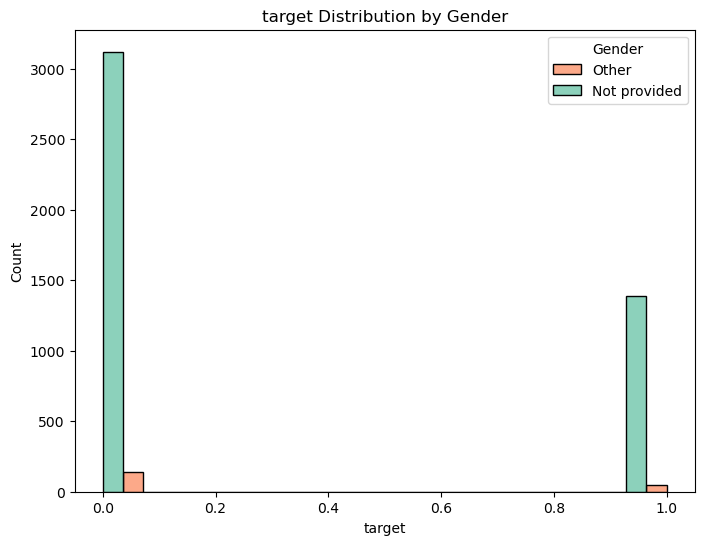

범주형 데이터 시각화


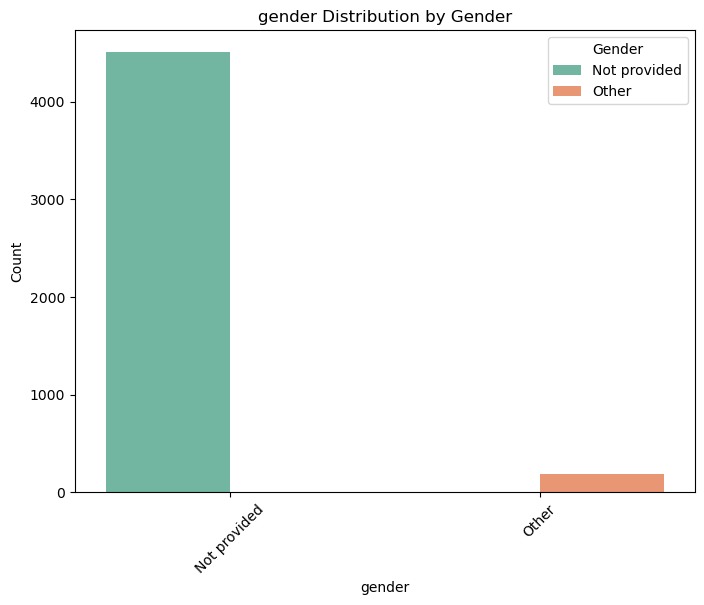

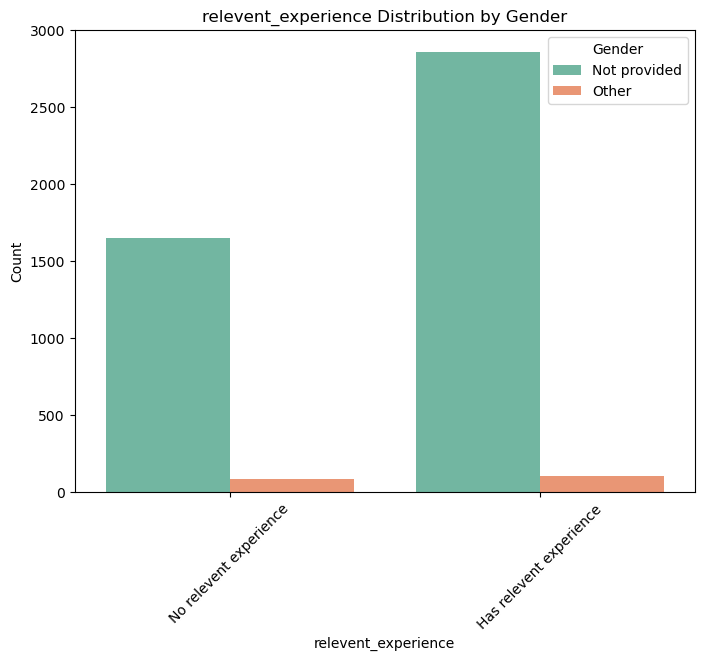

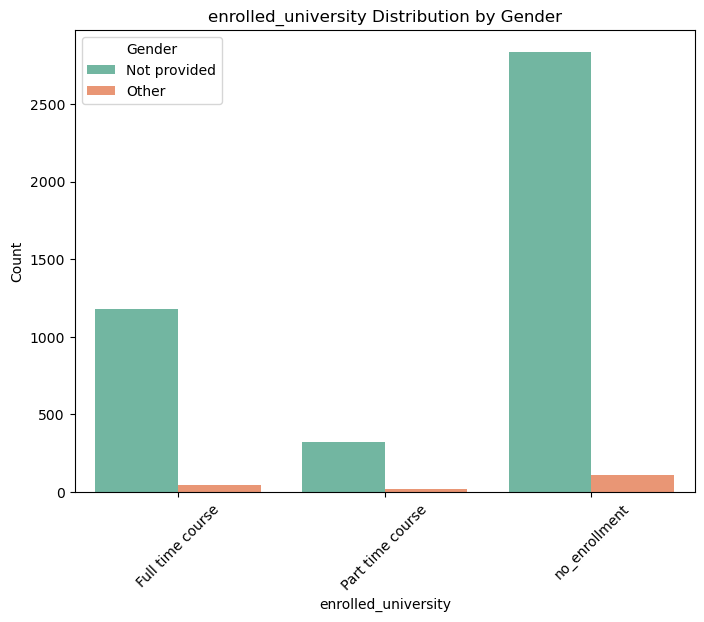

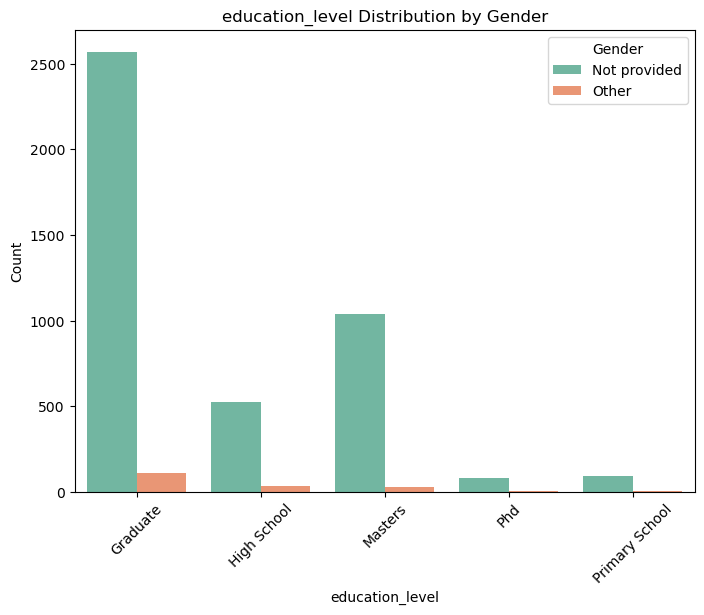

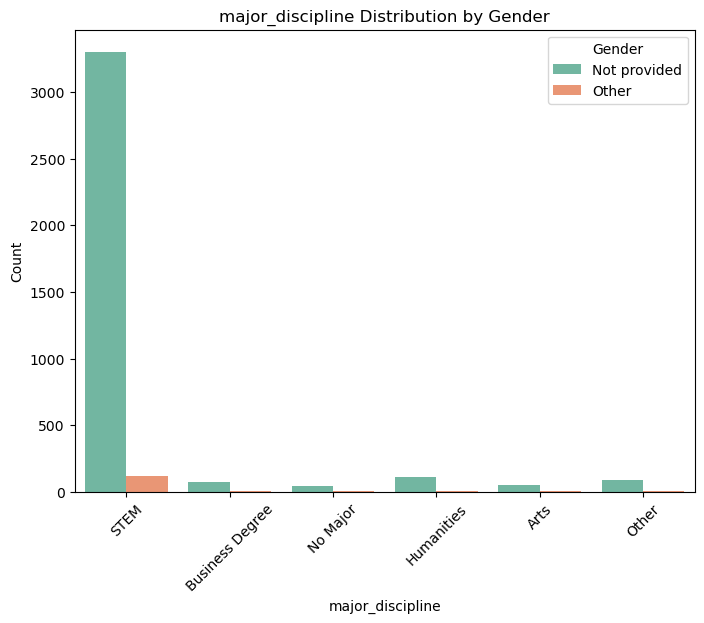

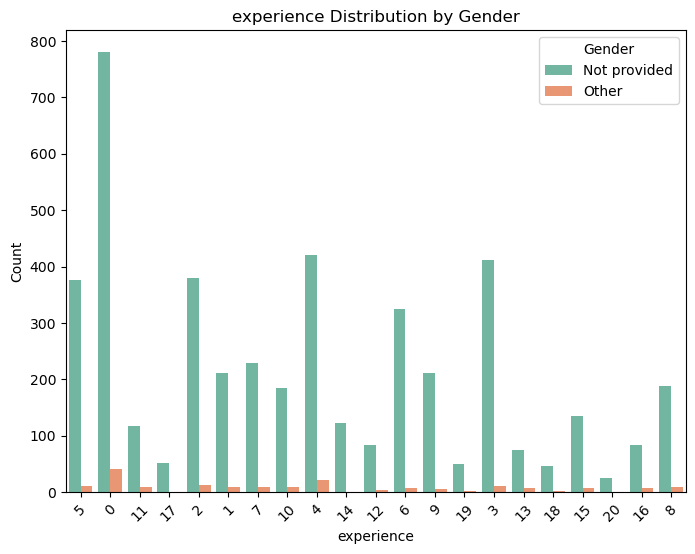

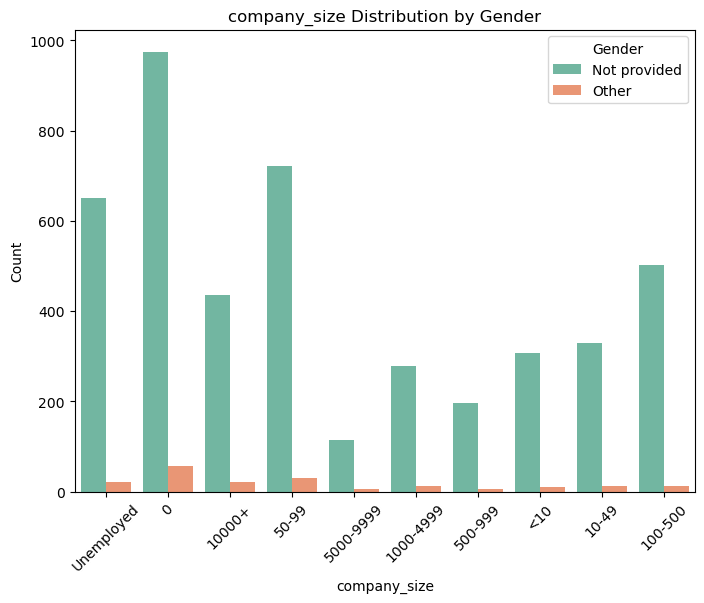

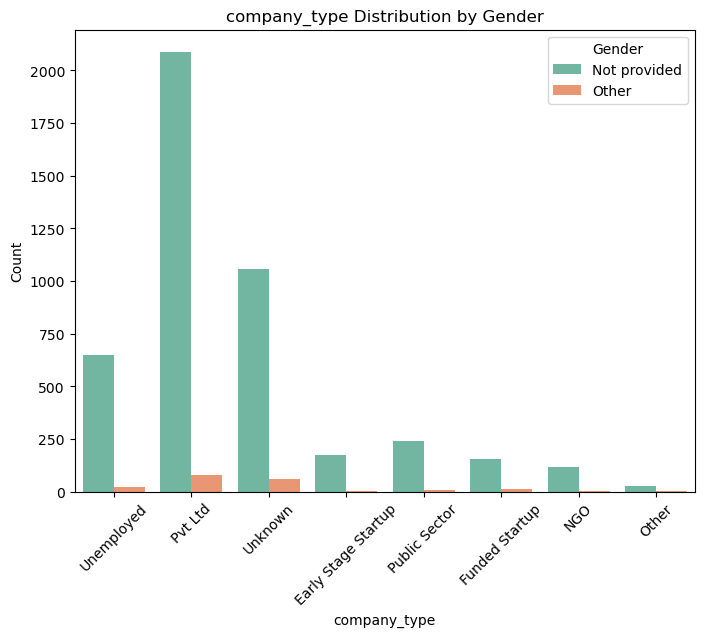

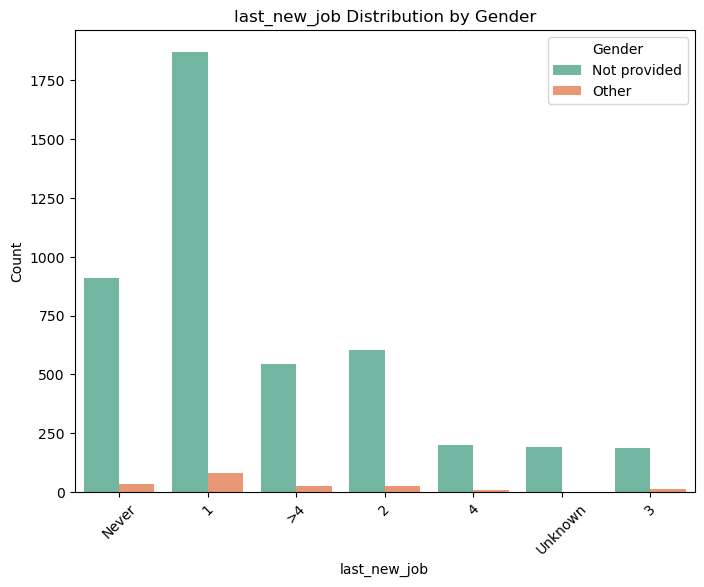

In [46]:
print('수치형 데이터 시각화')
# 수치형 데이터 시각화
for column in group_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_gender, x=column, hue='gender', multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Other', 'Not provided'])
    plt.show()

print('범주형 데이터 시각화')
# 범주형 데이터 시각화
for column in group_obj:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=aug_train_gender, x=column, hue='gender', palette='Set2')
    plt.title(f'{column} Distribution by Gender')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender', labels=['Not provided','Other'])
    plt.xticks(rotation=45)  # 범주형 데이터의 레이블이 길 경우 각도를 조정
    plt.show()


In [47]:
# 'gender'가 'Not provided'인 행의 'gender'를 'Other'로 변경
aug_train.loc[aug_train['gender'] == 'Not provided', 'gender'] = 'Other'

In [48]:
aug_train['gender'].value_counts(dropna=False)

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

##### Major variable
- 결측치와 Other이랑 합치려 했으나... education_level 에 분포의 차이가 있음
- 결측치는 'Unknown'으로, 'No Major'와 'Other' 도 각각 따로 가지고 가기로 결정

In [49]:
aug_train['major_discipline'].fillna('Unknown',inplace=True)

In [50]:
# 필터링 조건 수정: 'Unknown' 또는 'Other'
aug_train_major_discipline = aug_train[(aug_train['major_discipline'] == 'Unknown') | (aug_train['major_discipline'] == 'Other')]
aug_train_major_discipline['major_discipline'].value_counts(dropna= False)


Unknown    2813
Other       381
Name: major_discipline, dtype: int64

##### major dicipline의 'other'와 'unknown'의 분포 비교

In [51]:
group_num = aug_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = aug_train[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

수치형 데이터 시각화


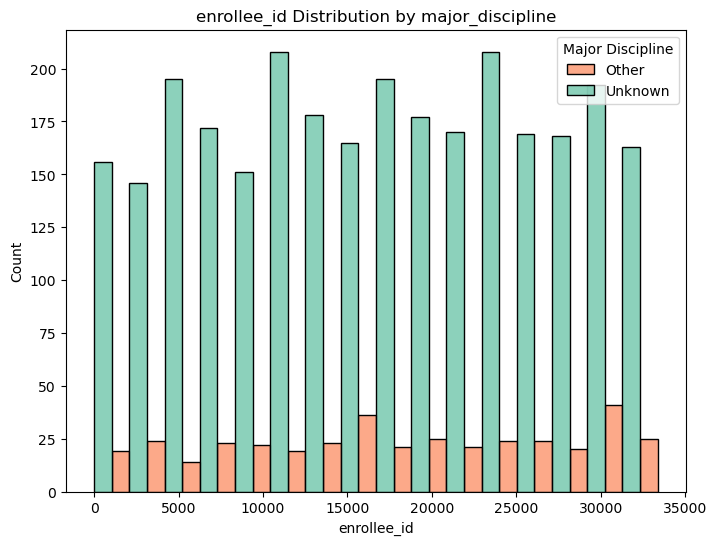

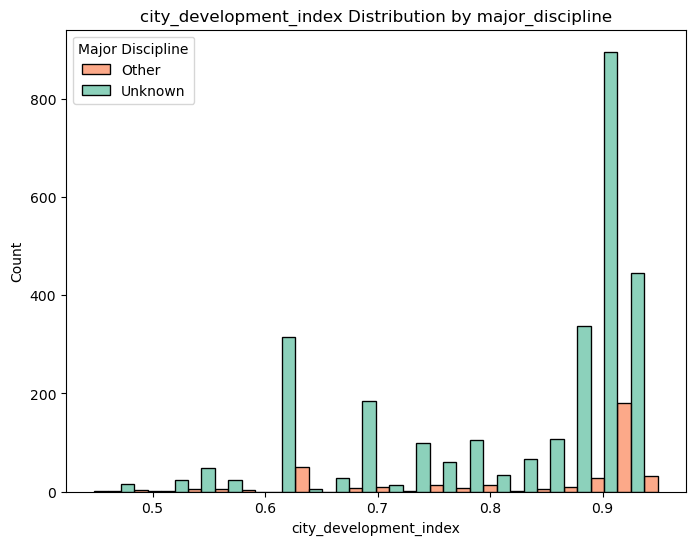

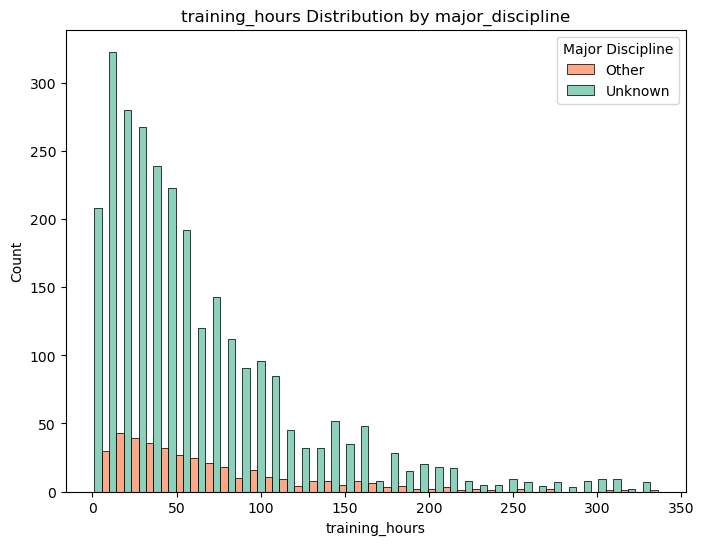

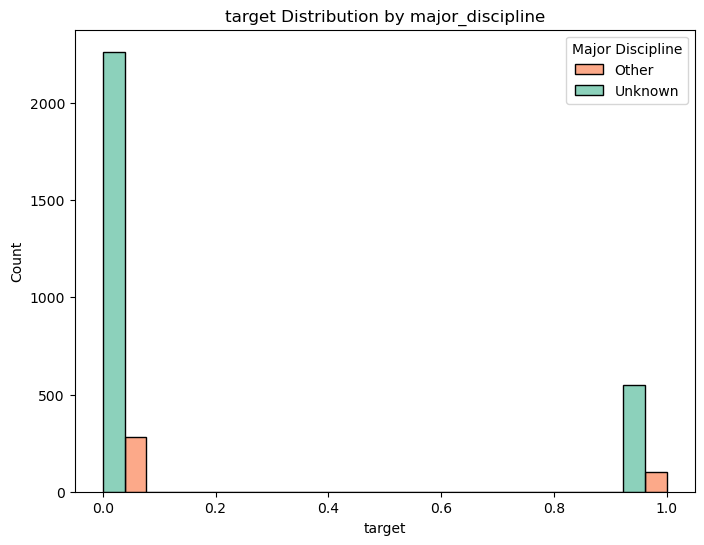

범주형 데이터 시각화


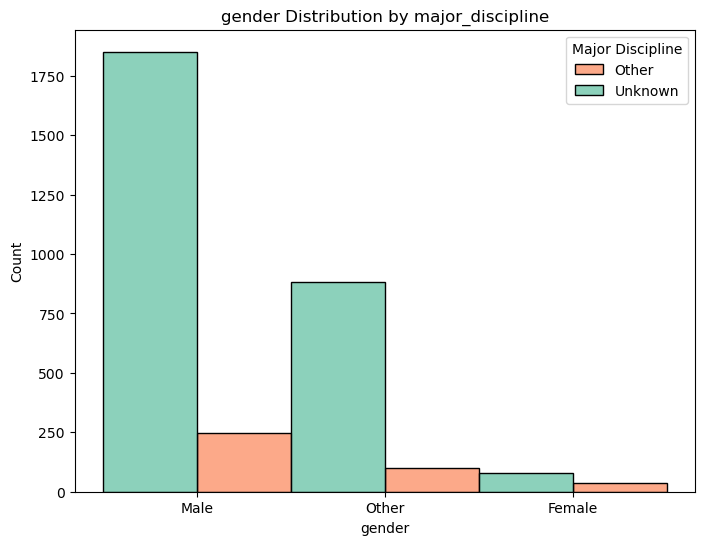

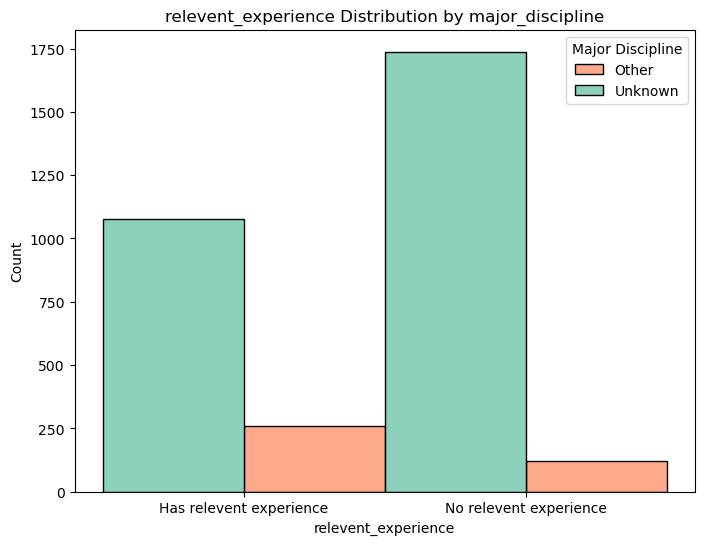

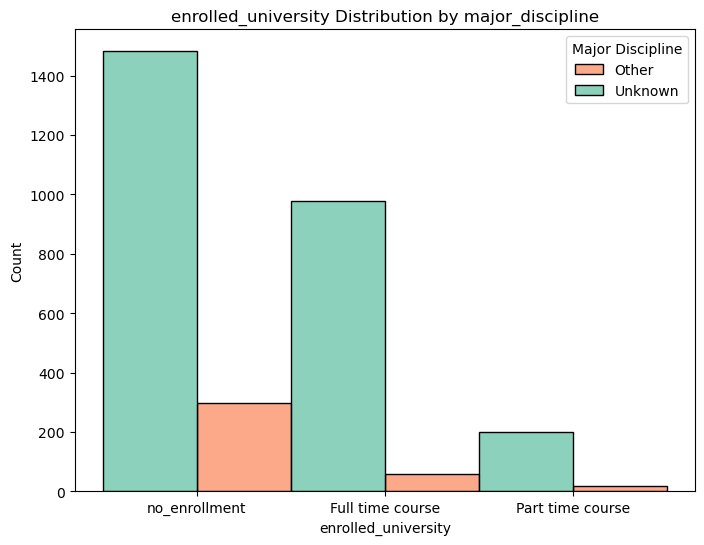

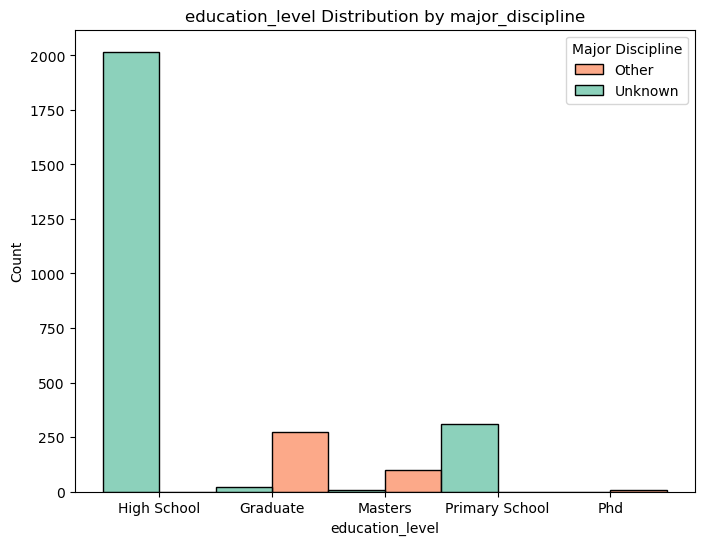

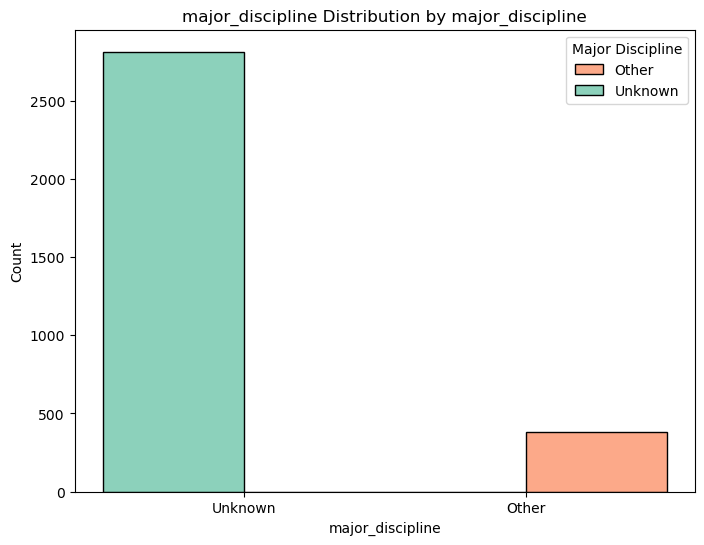

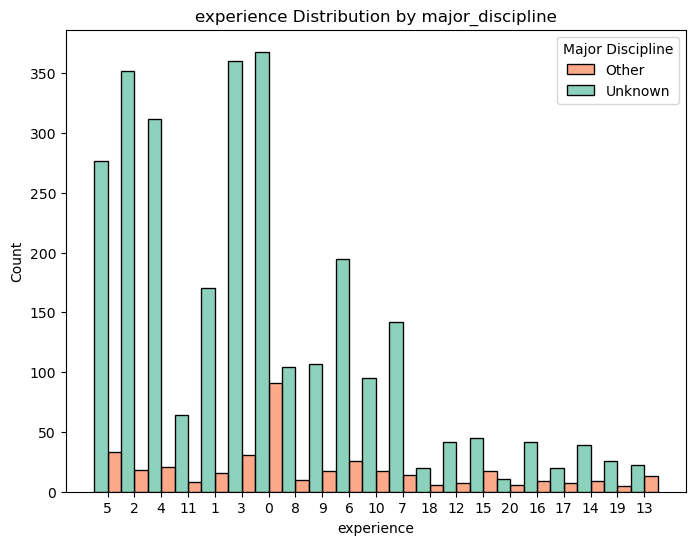

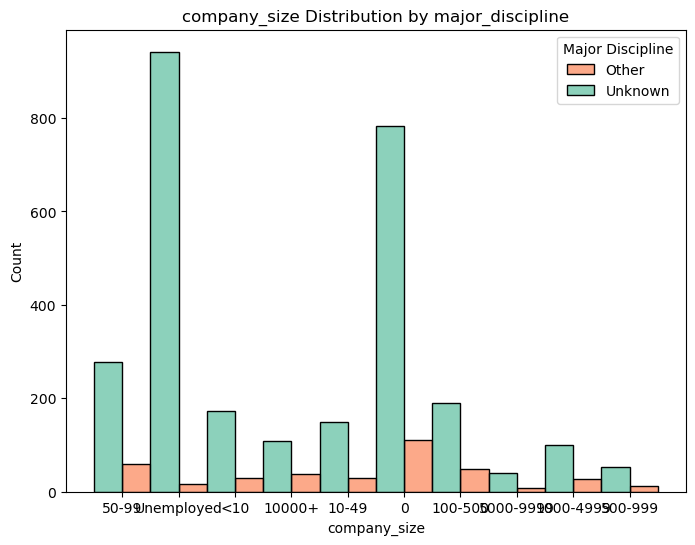

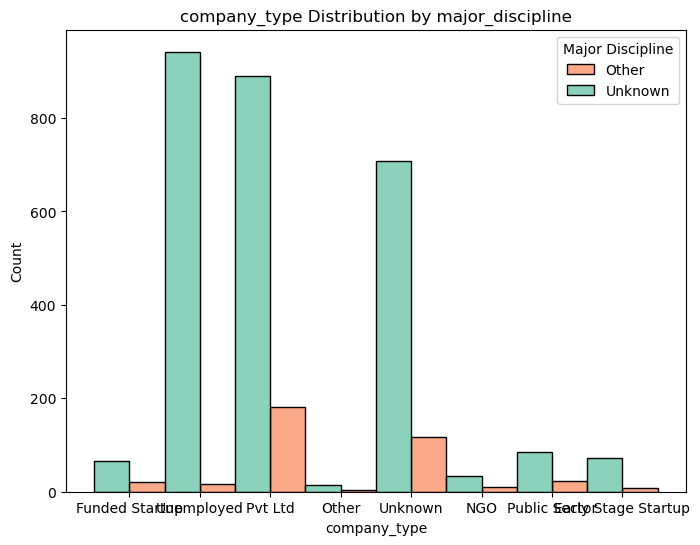

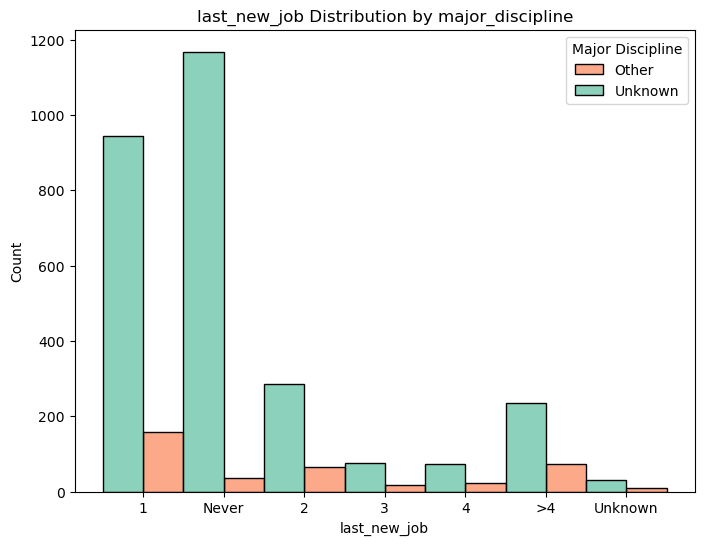

In [52]:
print('수치형 데이터 시각화')
# 수치형 데이터 시각화
for column in group_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_major_discipline, x=column, hue='major_discipline', multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by major_discipline')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Major Discipline', labels=['Other','Unknown'])
    plt.show()

print('범주형 데이터 시각화')
# 범주형 데이터 시각화
for column in group_obj:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=aug_train_major_discipline, x=column, hue='major_discipline',multiple='dodge', palette='Set2')
    plt.title(f'{column} Distribution by major_discipline')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Major Discipline', labels=['Other', 'Unknown'])
    plt.show()

In [53]:
aug_train['major_discipline'].value_counts(dropna=False)

STEM               14492
Unknown             2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

##### enrolled_university
- 결측치 : NaN                   386개(0.020148, 비율) => 'Unknown'으로

In [54]:
aug_train['enrolled_university'].value_counts(dropna=False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [55]:
aug_train[aug_train['education_level'].isnull()]['enrolled_university'].value_counts(dropna=False)

no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

In [56]:
### 보기 좋게만 만들기
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/3339035232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer


In [57]:
aug_train['enrolled_university'].fillna("Unknown", inplace=True)

In [58]:
aug_train['enrolled_university'].value_counts(dropna=False)

No Enrollment       13817
Full time course     3757
Part time course     1198
Unknown               386
Name: enrolled_university, dtype: int64

##### education_level
- 결측치 460개,           0.024011 ==> Unknown

In [59]:
aug_train['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [60]:
aug_train[aug_train['enrolled_university']=='Unknown']['education_level'].value_counts(dropna=False)

Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [61]:
aug_train.loc[aug_train['enrolled_university']=='no_enrollment','education_level'].value_counts(dropna=False)

Series([], Name: education_level, dtype: int64)

In [62]:
aug_train[aug_train['enrolled_university']=='No Enrollment']['education_level'].value_counts(dropna=False)

Graduate          8434
Masters           3547
High School        940
Phd                371
NaN                270
Primary School     255
Name: education_level, dtype: int64

In [63]:
aug_train['education_level'].fillna("Unknown", inplace=True)

In [64]:
aug_train['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
Unknown             460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

##### 결측치 있는 행 확인
- 결측치를 다 Unknown 살리고,
- Unknown 나름의 의미가 있다고 본다.

- 결측치로 인해서 데이터 행을 삭제하지 않고, 다 살려서 진행했다.

In [65]:
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
experience_under_1        0.0
experience_over_20        0.0
experience_Unknown        0.0
dtype: float64

##### 정수형으로 만들기

In [66]:
print(aug_train.dtypes)

enrollee_id                 int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
experience_under_1          int64
experience_over_20          int64
experience_Unknown          int64
dtype: object


In [67]:
# Converting objects to integers
aug_train['experience'] = aug_train['experience'].astype(str).astype(int)
aug_train['target'] = aug_train['target'].astype(int)

In [68]:
print(aug_train.dtypes)

enrollee_id                 int64
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
experience_under_1          int64
experience_over_20          int64
experience_Unknown          int64
dtype: object


##### 변수 value 임의의 순서로 지정하기

In [69]:
# 각 열의 고유 값 출력
for column in aug_train.columns:
    unique_values = aug_train[column].unique()
    print(f"Column '{column}' unique values: {unique_values}\n")

Column 'enrollee_id' unique values: [ 8949 29725 11561 ... 24576  5756 23834]

Column 'city_development_index' unique values: [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]

Column 'gender' unique values: ['Male' 'Other' 'Female']

Column 'relevent_experience' unique values: ['Has relevent experience' 'No relevent experience']

Column 'enrolled_university' unique values: ['No Enrollment' 'Full time course' 'Unknown' 'Part time course']

Column 'education_level' unique values: [

In [70]:
# Orders
ed_order = ['Primary School','High School','Graduate','Masters','Phd','Unknown']
enroll_order = ['No Enrollment','Part time course','Full time course','Unknown']
disc_order = ['STEM','Humanities','Business Degree','Arts','Other','No Major','Unknown']
exp_yrs_order = ['0','<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+','Unemployed']
job_order = ['Never', '1', '2', '3', '4', '>4','Unknown']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other']
company_order = ['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other','Unknown','Unemployed']

이 코드는 aug_train 데이터프레임을 사용하여 교육 수준(education_level)과 마지막 직업 변경 시기(last_new_job)에 따른 직업 경험(experience)을 분석하고, 직업을 찾는 사람과 그렇지 않은 사람의 비율을 비교하기 위해 데이터를 정규화하고 요약하는 과정을 포함하고 있습니다.

##### 각 변수별 유니크 값 확인하기

In [71]:
aug_train.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_under_1,experience_over_20,experience_Unknown
0,8949,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,0,0,Unknown,1,36,1,0,1,0
1,29725,0.776,Male,No relevent experience,No Enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,0,0,0
2,11561,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Unemployed,Unemployed,Never,83,0,0,0,0
3,33241,0.789,Other,No relevent experience,Unknown,Graduate,Business Degree,0,0,Pvt Ltd,Never,52,1,1,0,0
4,666,0.767,Male,Has relevent experience,No Enrollment,Masters,STEM,0,50-99,Funded Startup,4,8,0,0,1,0


In [72]:
aug_train.columns

Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'experience_under_1',
       'experience_over_20', 'experience_Unknown'],
      dtype='object')

In [73]:
aug_train.shape

(19158, 16)

* 14개 -> 총 33개 칼럼!

##### ------지선 -> 윤지 확인-----(지선 전처리에서 추가 코드된 부분이랑 수정된 부분 있어요!)----

#### 전처리 다하고 EDA 시작하기 전에, train, val, test 셋 분리하는 코드

In [74]:
from sklearn.model_selection import train_test_split

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

# train, val, test 셋 분리하는 코드
# 데이터셋 분할: Train/Validation + Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
# 데이터셋 분할: Train + Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=80)

In [75]:
# 열 이름 설정
feature_columns = aug_train.drop(columns=['target']).columns
target_column = ['target']

# numpy 배열을 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train_val, columns=feature_columns)
X_val_df = pd.DataFrame(X_val, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)
y_train_df = pd.DataFrame(y_train_val, columns=target_column)
y_val_df = pd.DataFrame(y_val, columns=target_column)
y_test_df = pd.DataFrame(y_test, columns=target_column)

# Ensure 'train_df' and 'test_df' are created correctly by concatenating X and y
# train_df : for visuals
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_val_df, y_val_df], axis=1)
new_data_df = pd.concat([X_test_df, y_test_df], axis=1)

# 출력 확인 : for visual
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             15326 non-null  object
 1   city_development_index  15326 non-null  object
 2   gender                  15326 non-null  object
 3   relevent_experience     15326 non-null  object
 4   enrolled_university     15326 non-null  object
 5   education_level         15326 non-null  object
 6   major_discipline        15326 non-null  object
 7   experience              15326 non-null  object
 8   company_size            15326 non-null  object
 9   company_type            15326 non-null  object
 10  last_new_job            15326 non-null  object
 11  training_hours          15326 non-null  object
 12  experience_under_1      15326 non-null  object
 13  experience_over_20      15326 non-null  object
 14  experience_Unknown      15326 non-null  object
 15  ta

In [76]:
X_train, X_test, y_train, y_test = X_train, X_val, y_train, y_val

#### EDA 전, unique한 값 확인
- 일단 모든 변수 object형이다.

In [77]:
#relevent_experience
aug_train['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [78]:
#
aug_train['enrolled_university'].unique()

array(['No Enrollment', 'Full time course', 'Unknown', 'Part time course'],
      dtype=object)

In [79]:
#
aug_train['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Unknown', 'Phd',
       'Primary School'], dtype=object)

In [80]:
#
aug_train['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Unknown', 'Arts', 'Humanities',
       'No Major', 'Other'], dtype=object)

In [81]:
#
aug_train['experience'].unique()

array([ 0, 15,  5, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,  3,
        6,  9,  8, 20])

In [82]:
aug_train['company_size'].unique()

array(['0', '50-99', 'Unemployed', '<10', '10000+', '5000-9999',
       '1000-4999', '10-49', '100-500', '500-999'], dtype=object)

In [83]:
aug_train['company_type'].unique()

array(['Unknown', 'Pvt Ltd', 'Unemployed', 'Funded Startup',
       'Early Stage Startup', 'Other', 'Public Sector', 'NGO'],
      dtype=object)

In [84]:
aug_train['last_new_job'].unique()

array(['1', '>4', 'Never', '4', '3', '2', 'Unknown'], dtype=object)

In [85]:
aug_train['last_new_job'].unique()

array(['1', '>4', 'Never', '4', '3', '2', 'Unknown'], dtype=object)

In [86]:
aug_train['training_hours'].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

## 기존 EDA 정리

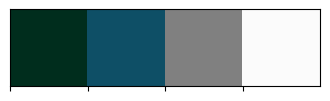

In [87]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

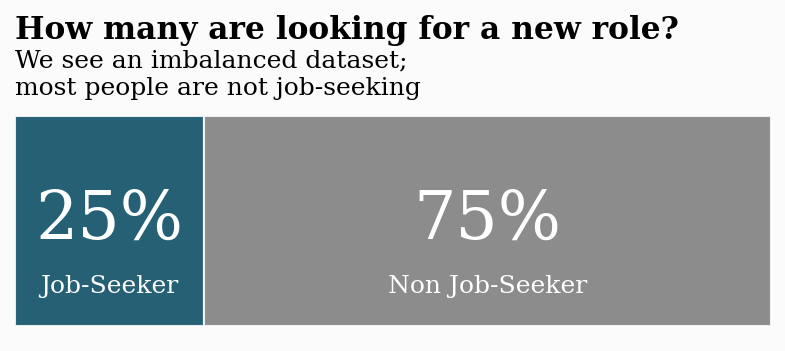

In [88]:
x=train_df.groupby(['target'])['target'].count()
y=len(train_df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  


plt.show()

In [89]:
print("Columns in train_df:", train_df.columns)
print("Columns in test_df:", test_df.columns)

Columns in train_df: Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'experience_under_1',
       'experience_over_20', 'experience_Unknown', 'target'],
      dtype='object')
Columns in test_df: Index(['enrollee_id', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'experience_under_1',
       'experience_over_20', 'experience_Unknown', 'target'],
      dtype='object')


/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/1288569611.py:78: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train["city_development_index"], ax=ax3,color="gray", shade=True, label="Train")
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/1288569611.py:79: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test["city_development_index"], ax=ax3, color="#0e4f66", shade=True, label="Test")
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/1288569611.py:144: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])


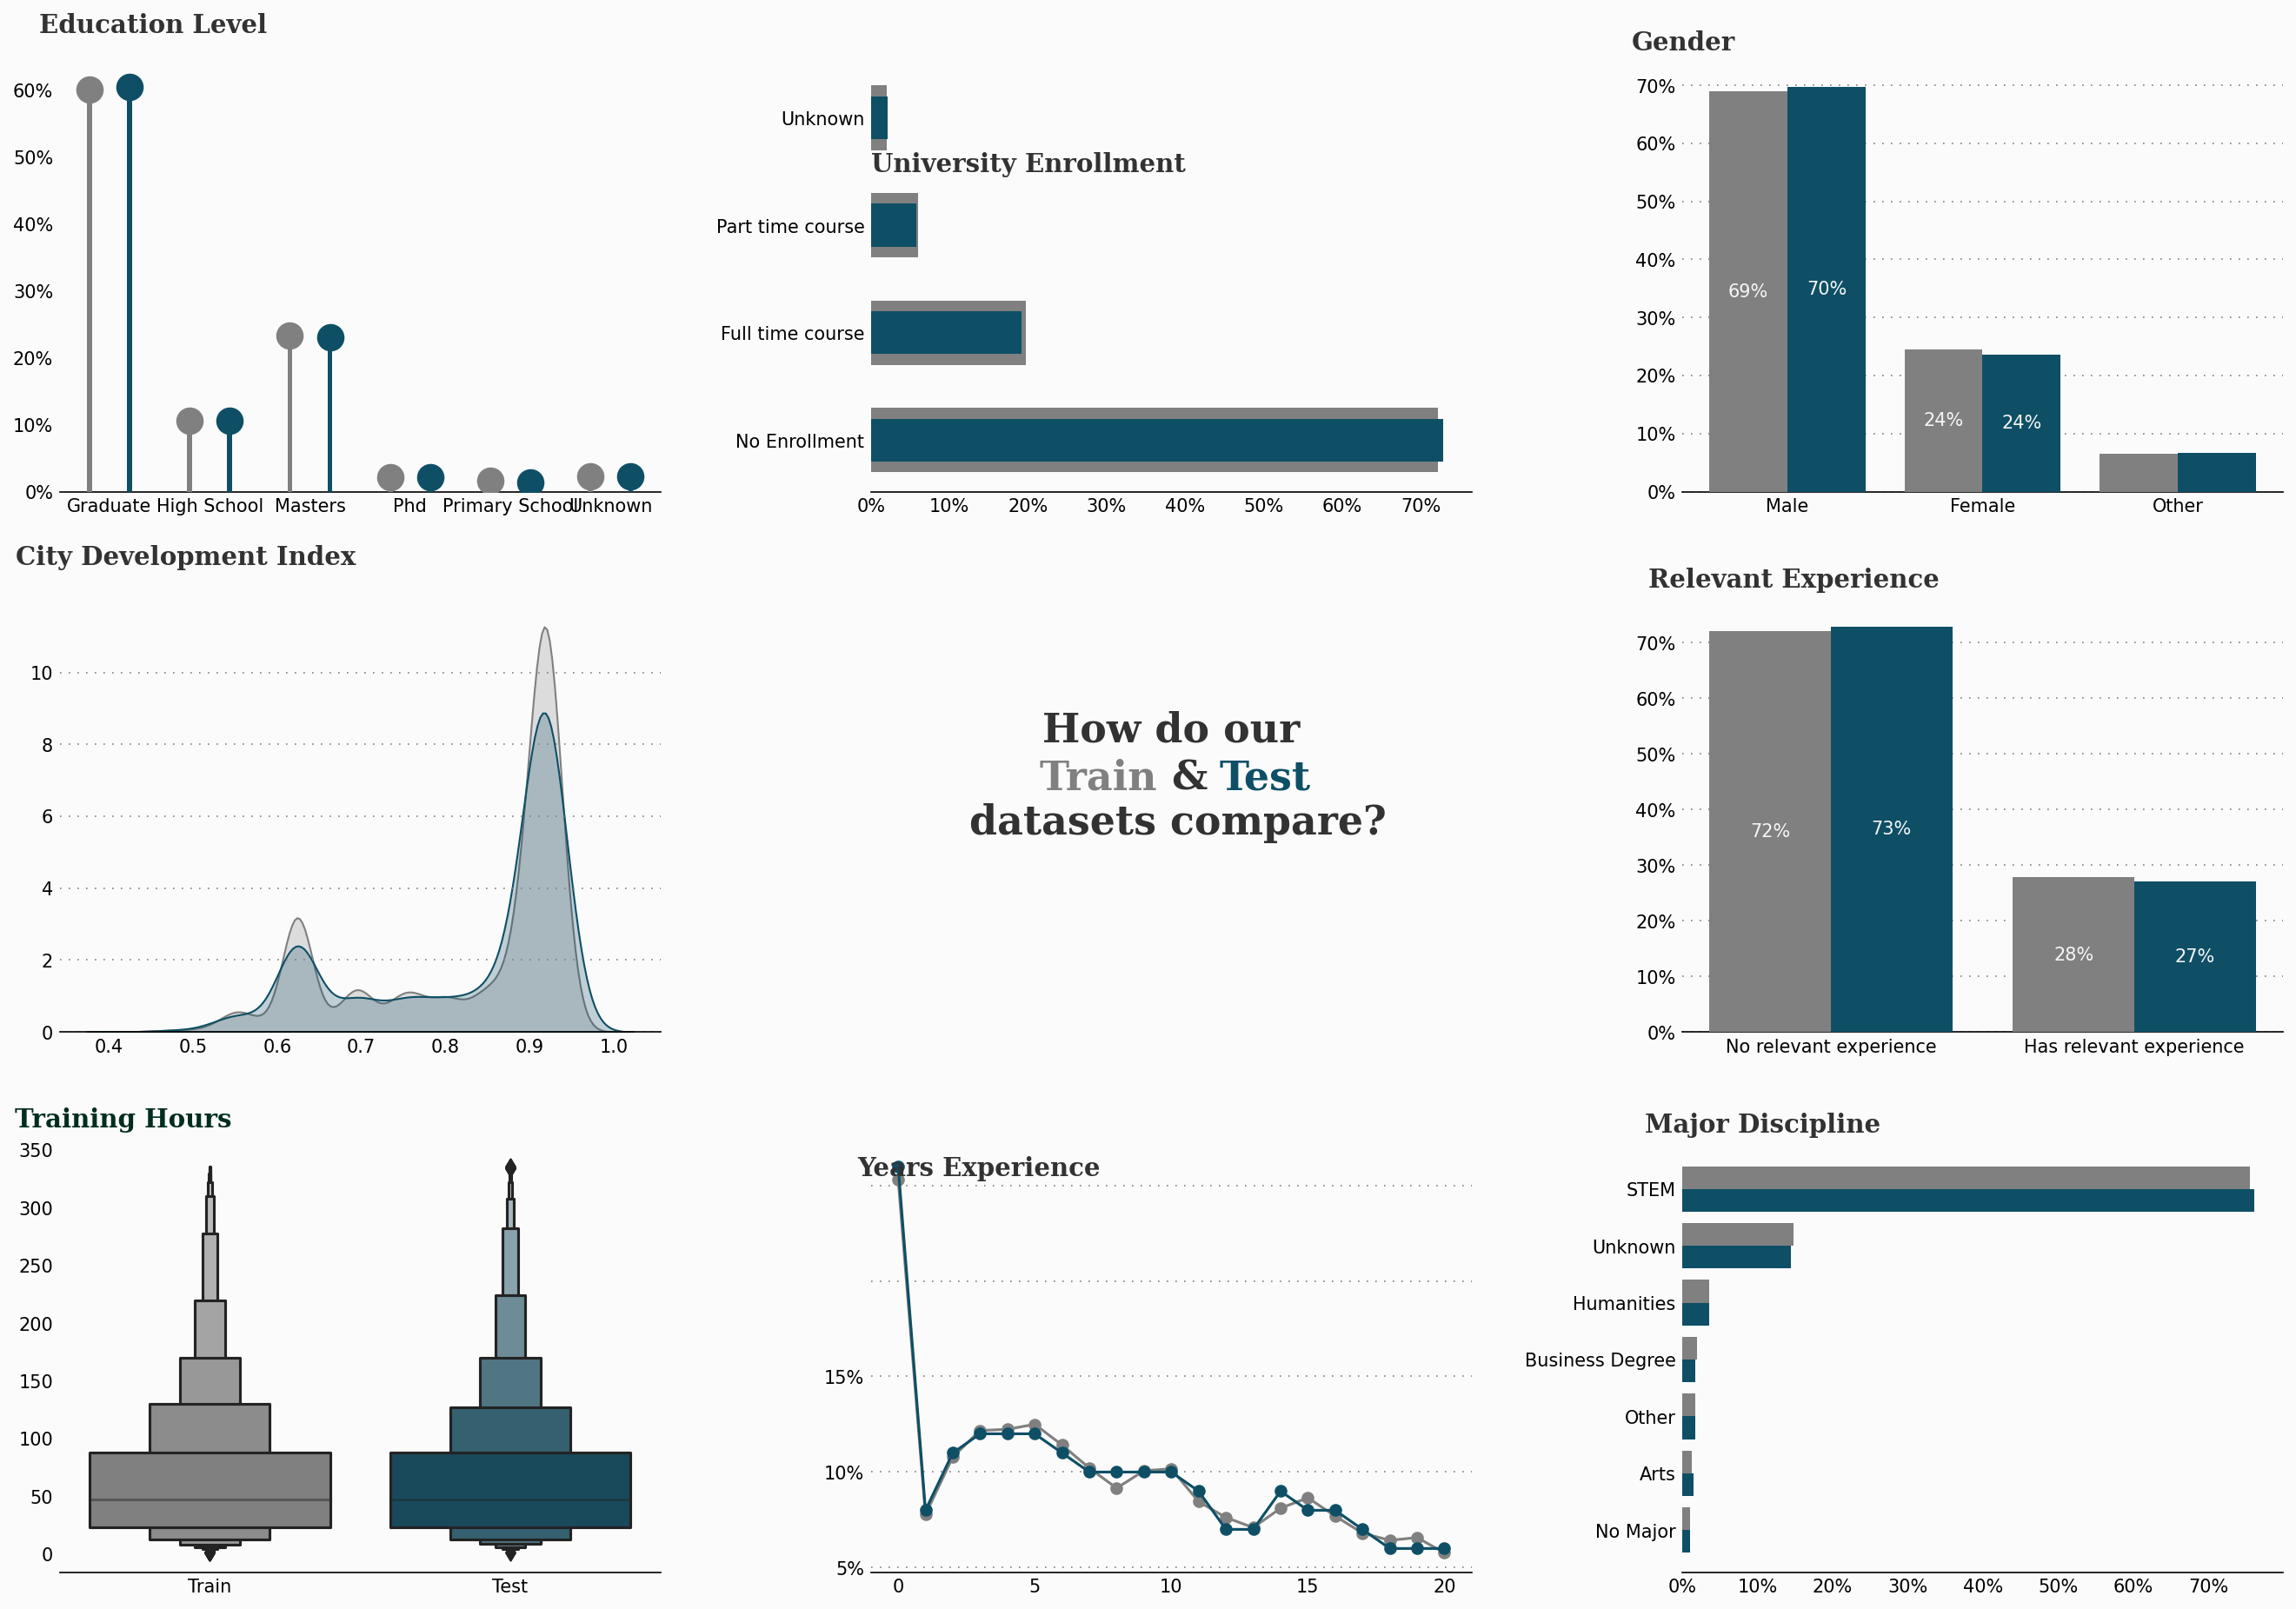

In [90]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])


# Ax0 - EDUCATION LEVEL
train = pd.DataFrame(train_df["education_level"].value_counts())
train["Percentage"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=3, color="gray", width=0.05)
ax0.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3,s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax0.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3,s=200, color="#0e4f66")
ax0.text(-0.5, 68.5, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(list(train.index),rotation=0)


# Ax1 - ENROLLED IN UNIVESITY
train = pd.DataFrame(train_df["enrolled_university"].value_counts())
train["Percentage"] = train["enrolled_university"].apply(lambda x: x/sum(train["enrolled_university"])*100).loc[enroll_order]
test = pd.DataFrame(test_df["enrolled_university"].value_counts())
test["Percentage"] = test["enrolled_university"].apply(lambda x: x/sum(test["enrolled_university"])*100).loc[enroll_order]

ax1.text(0, 2.5, 'University Enrollment', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train.index, train['Percentage'], color="gray", zorder=3, height=0.6)
ax1.barh(test.index, test['Percentage'], color="#0e4f66", zorder=3, height=0.4)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

###
# Ax2 - GENDER 
train = pd.DataFrame(train_df["gender"].value_counts())
train["Percentage"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
test = pd.DataFrame(test_df["gender"].value_counts())
test["Percentage"] = test["gender"].apply(lambda x: x/sum(test["gender"])*100)

x = np.arange(len(train))
ax2.text(-0.6, 76, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax2.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female','Other'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

    
## Ax 3 - CDI

ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train = pd.DataFrame(train_df["city_development_index"])
test = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train["city_development_index"], ax=ax3,color="gray", shade=True, label="Train")
sns.kdeplot(test["city_development_index"], ax=ax3, color="#0e4f66", shade=True, label="Test")
ax3.text(0.29, 13, 'City Development Index', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax3.set_ylabel('')    
ax3.set_xlabel('')

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')




### Ax5 - RELEVANT EXPERIENCE
train = pd.DataFrame(train_df["relevent_experience"].value_counts())
train["Percentage"] = train["relevent_experience"].apply(lambda x: x/sum(train["relevent_experience"])*100)
test = pd.DataFrame(test_df["relevent_experience"].value_counts())
test["Percentage"] = test["relevent_experience"].apply(lambda x: x/sum(test["relevent_experience"])*100)
x = np.arange(len(train))
ax5.text(-0.4, 80, 'Relevant Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax5.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['No relevant experience','Has relevant experience'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(10))

for i,j in zip([0, 1, 2], train["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1, 2], test["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
    
# Ax6 - TRAINING HOURS
train = pd.DataFrame(train_df["training_hours"])
train["TrainTest"] = "Train"
test = pd.DataFrame(test_df["training_hours"])
test["TrainTest"] = "Test"
ax6.text(-0.65, 370, 'Training Hours', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
comb_graph_temp_df = pd.concat([train, test], axis=0)
sns.boxenplot(ax=ax6, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["gray", "#0e4f66"])
ax6.set_xlabel("")
ax6.set_ylabel("")


# Ax7 - EXPERIENCE YRS
train = pd.DataFrame(train_df["experience"].value_counts())
train["Percentage"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Percentage"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax7.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax7.text(-1.5, 20.5, 'Years Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])
ax7.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax7.yaxis.set_major_locator(mtick.MultipleLocator(5))


# Ax8 - MAJOR DISCIPLINE
train = pd.DataFrame(train_df["major_discipline"].value_counts())
train["Percentage"] = train["major_discipline"].apply(lambda x: x/sum(train["major_discipline"])*100)
test = pd.DataFrame(test_df["major_discipline"].value_counts())
test["Percentage"] = test["major_discipline"].apply(lambda x: x/sum(test["major_discipline"])*100)

ax8.barh(np.arange(len(train.index)), train["Percentage"], zorder=3, color="gray", height=0.4)
ax8.barh(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, color="#0e4f66", height=0.4)
ax8.text(-5, -0.8, 'Major Discipline', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax8.set_yticklabels(list(test.index))
ax8.invert_yaxis()



for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/375850010.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)


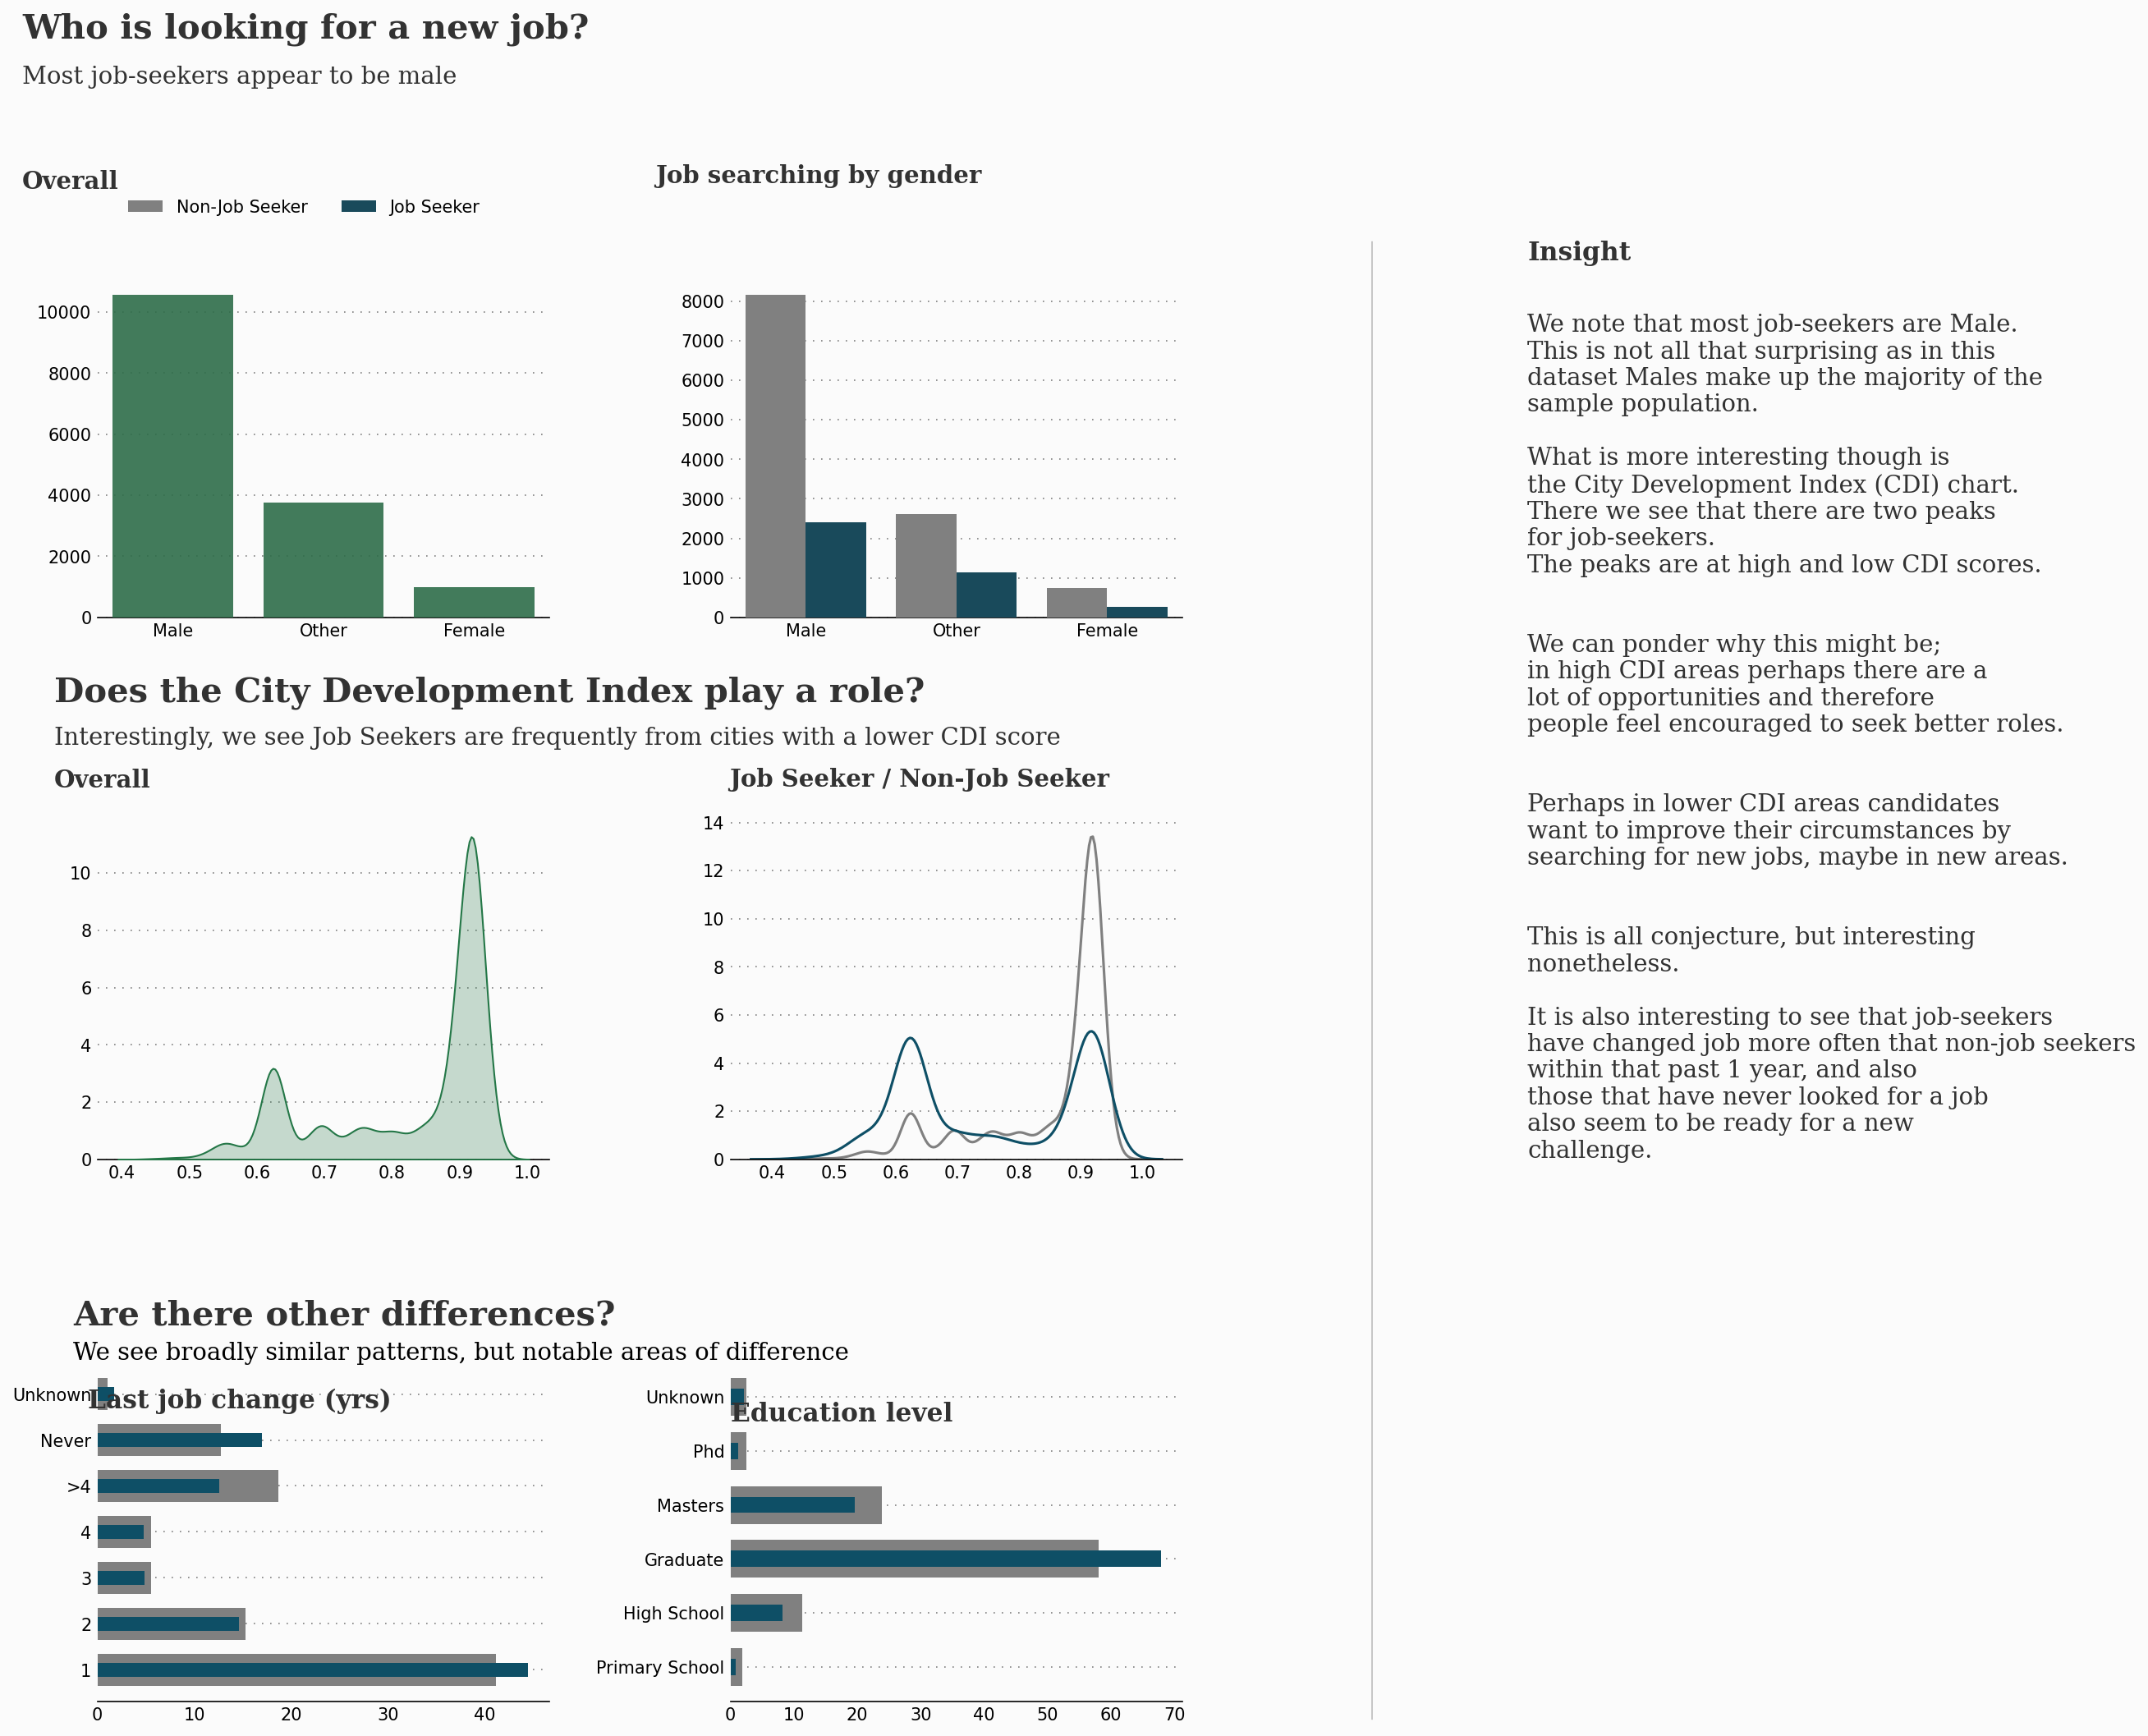

In [91]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Distribution
ax0.text(-1, 19000, 'Who is looking for a new job?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 17500, 'Most job-seekers appear to be male', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1, 14050, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x=train_df["gender"], color="#247747", ax=ax0, zorder=3,alpha=0.9)



# Gender
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=train_df, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)



# CDI
ax2.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 14.5, 'Interestingly, we see Job Seekers are frequently from cities with a lower CDI score', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 13, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)



ax3.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df.loc[(train_df["target"]==0), "city_development_index"], color="gray", label="Not Survived", ax=ax3)
sns.kdeplot(train_df.loc[(train_df["target"]==1), "city_development_index"], color="#0e4f66", label="Survived", ax=ax3)



###
aug_train['count'] = 1
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

###


ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))


##
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax4.text(-1, 5.7, 'Last job change (yrs)',fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')
ax5.text(0, 4.55, 'Education level', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 7.5, 'Are there other differences?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.75, 
         'We see broadly similar patterns, but notable areas of difference', 
         fontsize=14, fontweight='light', fontfamily='serif')


####

fig.text(0.77, 0.89
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.39, '''
We note that most job-seekers are Male.
This is not all that surprising as in this
dataset Males make up the majority of the
sample population.

What is more interesting though is
the City Development Index (CDI) chart.
There we see that there are two peaks
for job-seekers. 
The peaks are at high and low CDI scores. 


We can ponder why this might be;
in high CDI areas perhaps there are a 
lot of opportunities and therefore
people feel encouraged to seek better roles.


Perhaps in lower CDI areas candidates
want to improve their circumstances by
searching for new jobs, maybe in new areas. 


This is all conjecture, but interesting
nonetheless.

It is also interesting to see that job-seekers
have changed job more often that non-job seekers
within that past 1 year, and also
those that have never looked for a job
also seem to be ready for a new
challenge.
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()

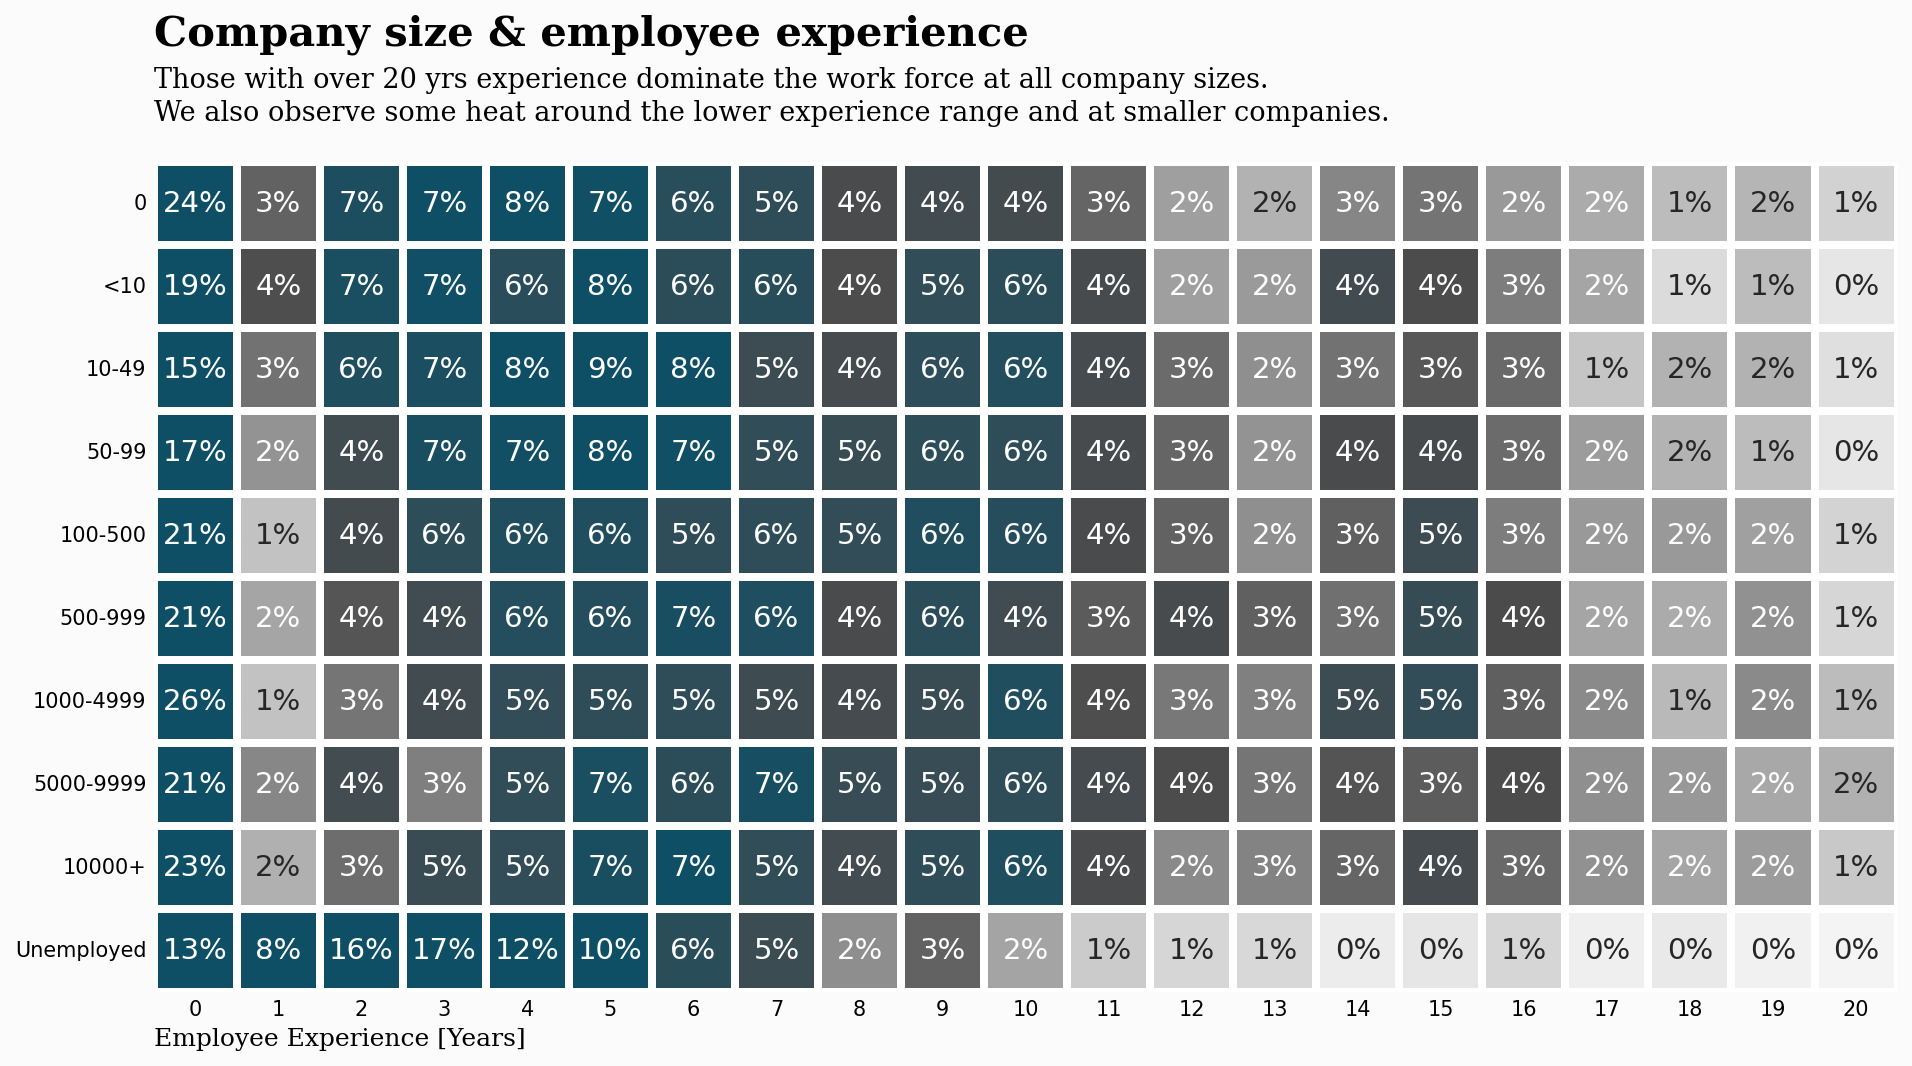

In [92]:
pv_gen_size = pd.pivot_table(aug_train, values='count',index=['gender'],columns=['company_size'],aggfunc=np.sum).loc[gender_order, size_order]
ct_gen_size = pd.crosstab(aug_train['company_size'],aug_train['experience'], normalize='index').loc[size_order,exp_yrs_order_2]


fig = plt.figure(figsize=(15,10), dpi=150) 
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax0 = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

 
ax0.set_facecolor(background_color) 
ax0.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=12,loc='left')
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.text(0, -1.4, 
         'Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.9, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.5, 
         'We also observe some heat around the lower experience range and at smaller companies.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

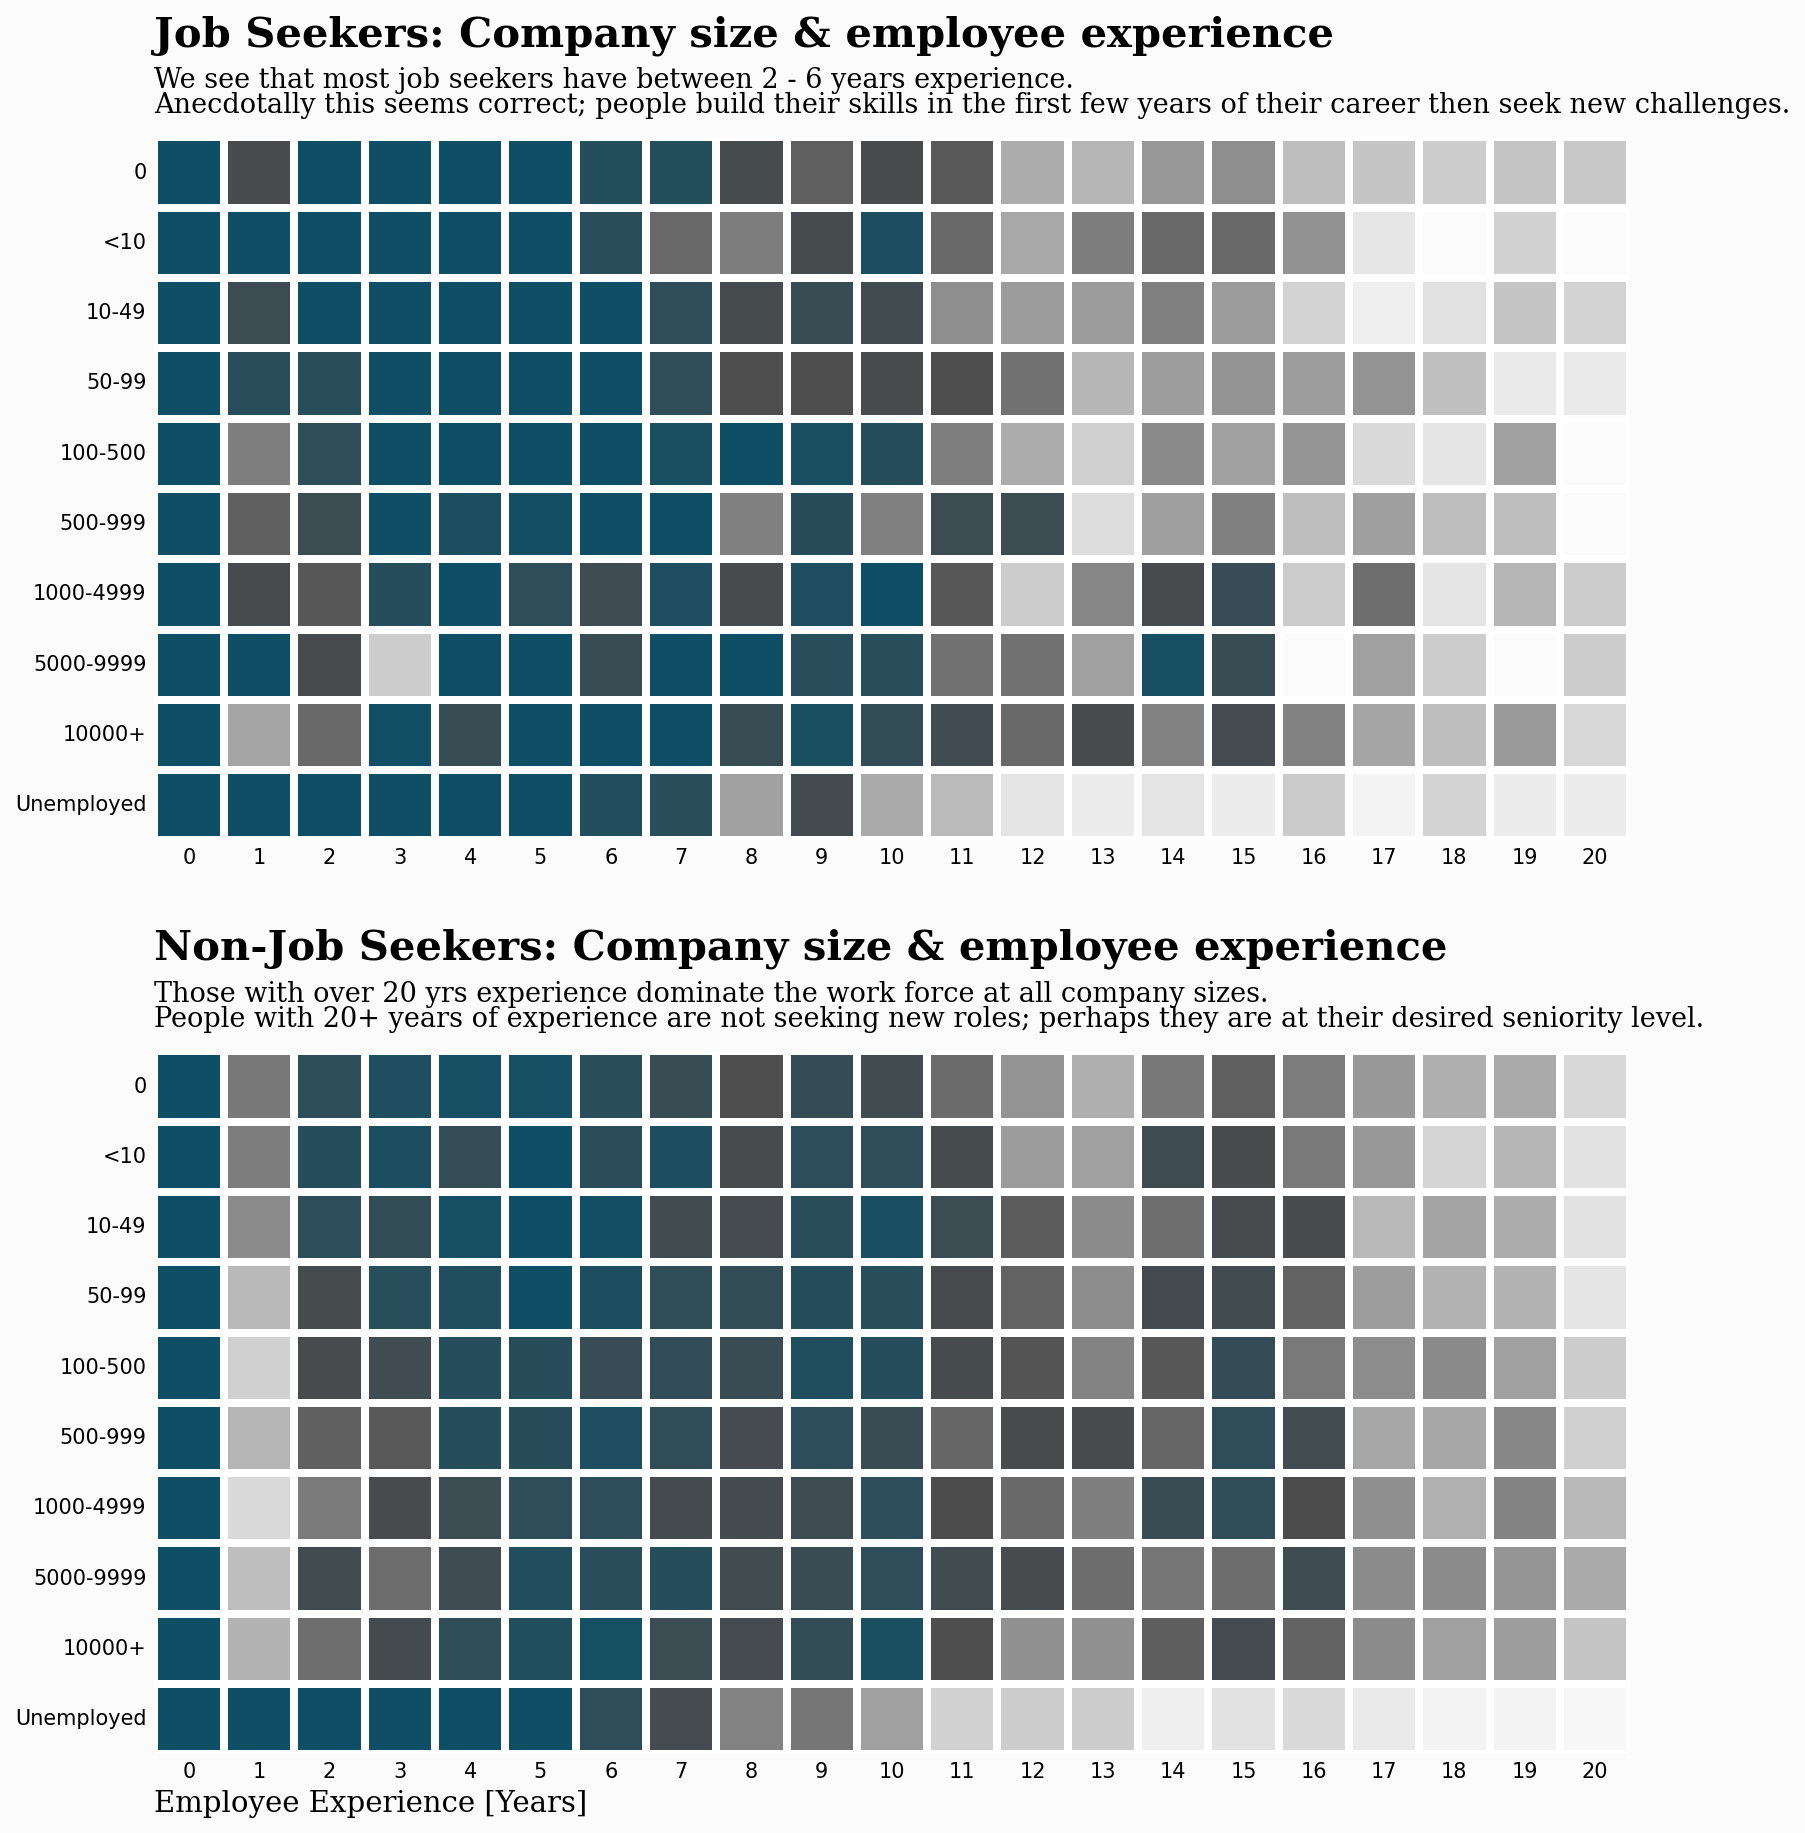

In [93]:
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_seek = pd.crosstab(job_hunt_only['company_size'],job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order_2]
no_seek = pd.crosstab(no_job_hunt_only['company_size'],no_job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order_2]

###
fig = plt.figure(figsize=(14,14),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.3)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])


colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})

ax0.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=14,loc='left')
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(0, -1.3, 
         'Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax1.text(0, -0.7, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax1.text(0, -0.35, 
         'People with 20+ years of experience are not seeking new roles; perhaps they are at their desired seniority level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
    
ax1.text(0, -1.3, 
         'Non-Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.7, 
         'We see that most job seekers have between 2 - 6 years experience.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.35, 
         'Anecdotally this seems correct; people build their skills in the first few years of their career then seek new challenges.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

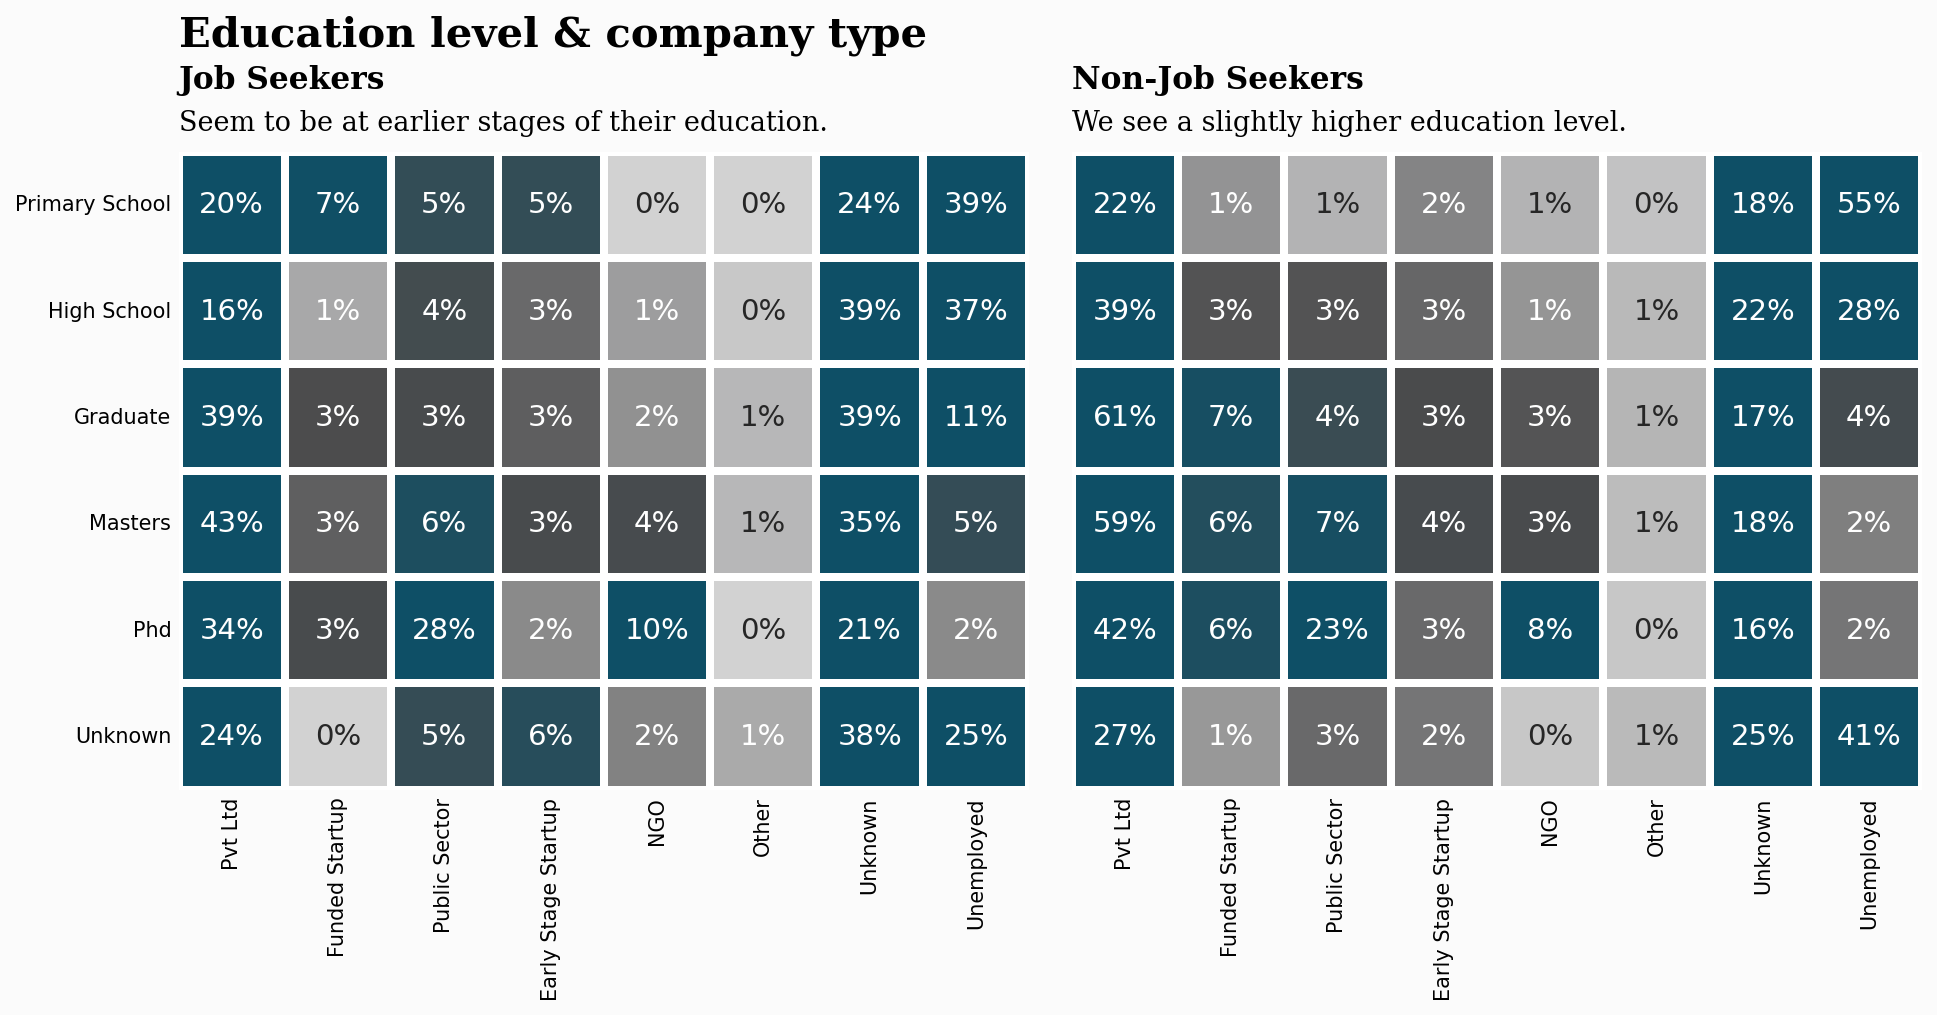

In [94]:
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_seek = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]
no_seek = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]


fig = plt.figure(figsize=(15,15),dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,yticklabels=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})


ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    
    
ax0.text(0, -1, 
         'Education level & company type', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.6, 
         'Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.2, 
         'Seem to be at earlier stages of their education.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )


###

ax1.text(0, -0.6, 
         'Non-Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax1.text(0, -0.2, 
         'We see a slightly higher education level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
    

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

In [95]:
# Orders
#ed_order = ['Primary School','High School','Graduate','Masters','Phd']
#enroll_order = ['No Enrollment','Part time course','Full time course']
#disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
#exp_yrs_order = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
#size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
#job_order = ['Never', '1', '2', '3', '4', '>4']
#exp_order =['No relevant experience','Has relevant experience']
#gender_order = ['Male','Female','Other','Not provided']
#company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

In [96]:
data = train_df
data['count'] = 1

data_plot = pd.pivot_table(data, values='count', index=['major_discipline'], columns=['company_size'], aggfunc=np.sum).fillna(0).astype(int).stack().loc[disc_order, size_order]
data_job_seek = pd.pivot_table(data[data['target']==1], values='count', index=['major_discipline'], columns=['company_size'], aggfunc=np.sum).fillna(0).astype(int).stack().loc[disc_order, size_order]
data_no_job_seek = pd.pivot_table(data[data['target']==0], values='count', index=['major_discipline'], columns=['company_size'], aggfunc=np.sum).fillna(0).astype(int).stack().loc[disc_order, size_order]

In [97]:
# https://stackoverflow.com/questions/56337732/how-to-plot-scatter-pie-chart-using-matplotlib
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.9, ec=background_color)

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/1382256692.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_centre.set_xticklabels(size_order,fontfamily='serif', fontsize=11, rotation=90)
/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/1382256692.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


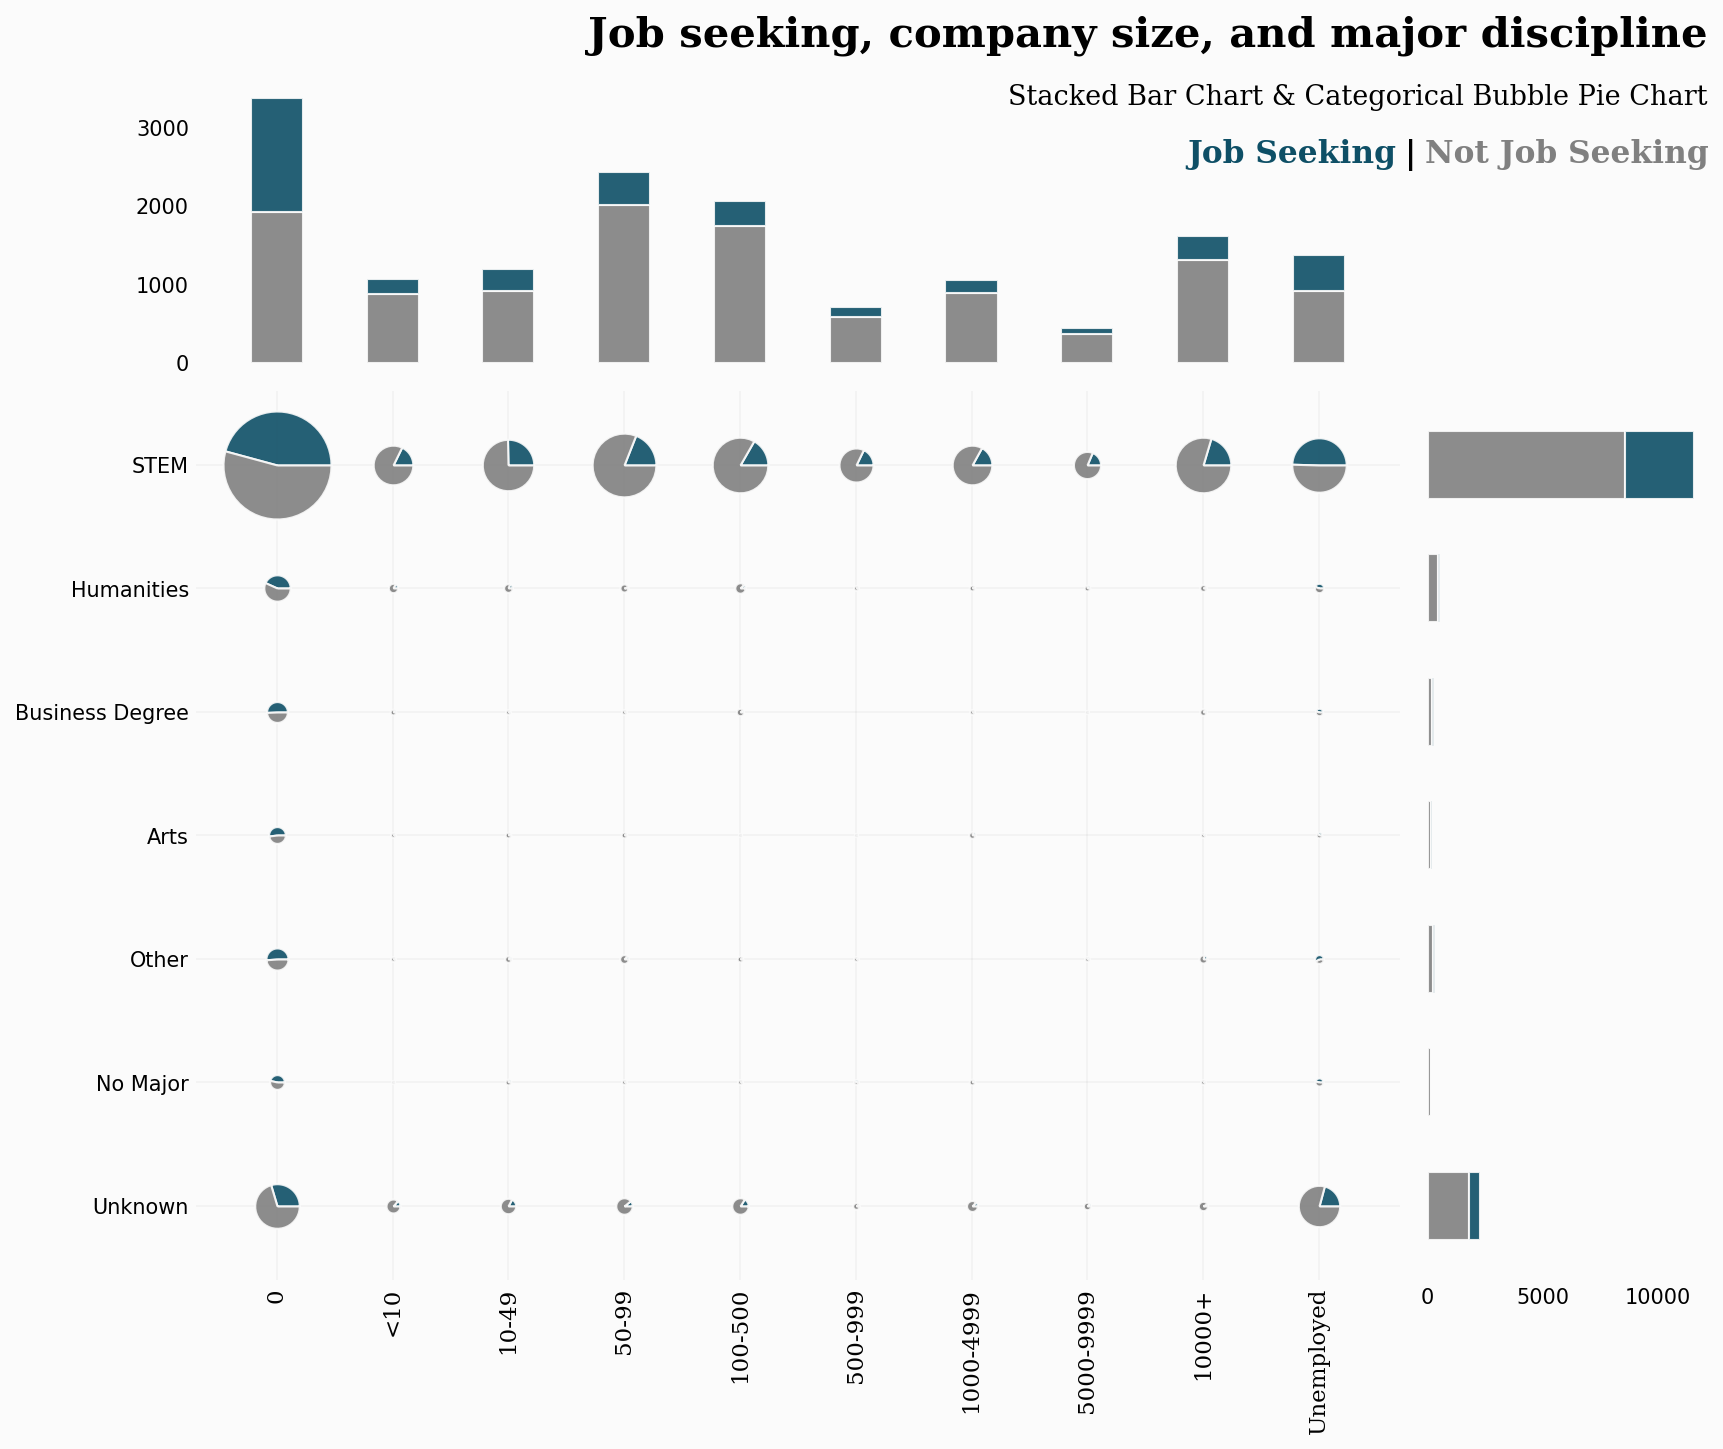

In [98]:
# Plot inspired by Subin An

fig = plt.figure(figsize=(13, 13), dpi=150)
gs = fig.add_gridspec(5, 5)
gs.update(wspace=0.1, hspace=0.1)
fig.patch.set_facecolor(background_color) 

# Pie 

ax_centre = fig.add_subplot(gs[1:4, 0:4]) 
for cl_idx in disc_order[::-1]:
    for age_idx in size_order:
        seek = data_job_seek[cl_idx][age_idx]
        no_seek = data_no_job_seek[cl_idx][age_idx]
        total = data_job_seek[cl_idx][age_idx]
        drawPieMarker([age_idx],[cl_idx], [seek/(seek+no_seek), no_seek/(seek+no_seek)] ,[total*2.5], ["#0e4f66", "gray"], ax=ax_centre)

ax_centre.grid(linewidth=0.1)        
ax_centre.set_facecolor(background_color)
ax_centre.set_xticklabels(size_order,fontfamily='serif', fontsize=11, rotation=90)

 # Top
ax_top = fig.add_subplot(gs[0, :4], sharex=ax_centre) 
c_size_non = data[data['target']==0]['company_size'].value_counts()[size_order]
ax_top.bar(c_size_non.index, c_size_non, width=0.45, alpha=0.9,ec=background_color, color='gray')

c_size = data[data['target']==1]['company_size'].value_counts()[size_order]
ax_top.bar(c_size.index, c_size, bottom=c_size_non , width=0.45, alpha=0.9, ec=background_color,color='#0e4f66')

plt.setp(ax_top.get_xticklabels(), visible=False)
ax_top.set_facecolor(background_color)

# Side 
ax_side = fig.add_subplot(gs[1:4, 4], sharey=ax_centre) 
disc_no = data[data['target']==0]['major_discipline'].value_counts()[disc_order]
ax_side.barh(disc_no.index[::-1], disc_no[::-1], height=0.55, alpha=0.9,ec=background_color, color='gray')

disc_yes = data[data['target']==1]['major_discipline'].value_counts()[disc_order]
ax_side.barh(disc_yes.index[::-1], disc_yes[::-1], left= disc_no[::-1],height=0.55, alpha=0.9, ec=background_color,color='#0e4f66')

plt.setp(ax_side.get_yticklabels(), visible=False)
ax_side.set_facecolor(background_color)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_centre.spines[s].set_visible(False)
    ax_top.spines[s].set_visible(False)
    ax_side.spines[s].set_visible(False)
ax_centre.set_axisbelow(True)    

fig.text(0.9, 0.9, 'Job seeking, company size, and major discipline', fontweight='bold', fontfamily='serif', fontsize=20, ha='right') 
fig.text(0.9, 0.87, 'Stacked Bar Chart & Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', fontsize=13, ha='right')

fig.text(0.633,0.84,"Job Seeking", fontweight="bold", fontfamily='serif', fontsize=15, color='#0e4f66')
fig.text(0.745,0.84,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.755,0.84,"Not Job Seeking", fontweight="bold", fontfamily='serif', fontsize=15, color='gray')

ax_centre.tick_params(axis=u'both', which=u'both',length=0)
ax_top.tick_params(axis=u'both', which=u'both',length=0)
ax_side.tick_params(axis=u'both', which=u'both',length=0)

plt.tight_layout()
plt.show()

In [99]:
# Orders
ed_order = ['Primary School','High School','Graduate','Masters','Phd','Unknown']
enroll_order = ['No Enrollment','Part time course','Full time course','Unknown']
disc_order = ['STEM','Humanities','Business Degree','Arts','Other','No Major','Unknown']
exp_yrs_order = ['0','<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+','Unemployed']
job_order = ['Never', '1', '2', '3', '4', '>4','Unknown']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other']
company_order = ['Pvt Ltd','Funded Startup','Public Sector','Early Stage Startup','NGO','Other','Unknown','Unemployed']

In [100]:
job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]
jc_never = job_change['Never']


job_change_norm = pd.crosstab(aug_train['education_level'],aug_train['last_new_job'],normalize='columns').loc[ed_order,job_order,]
job_change_norm = round(job_change_norm*100,1).astype(int)




##
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]


seekers_job_change_norm = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['last_new_job'],normalize='columns').loc[ed_order,job_order,]
seekers_job_change_norm = round(seekers_job_change_norm*100,1).astype(int)
seekers_job_change_norm

non_seekers_job_change_norm = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['last_new_job'],normalize='columns').loc[ed_order,job_order,]
non_seekers_job_change_norm = round(non_seekers_job_change_norm*100,1).astype(int)

## 새로운 EDA 여기서부터 시작!

In [101]:
group_num = train_df[['enrollee_id', 'city_development_index', 'training_hours', 'target']]
group_obj = train_df[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size',
                       'company_type', 'last_new_job']]

## 실수형 변수 자료 분석

/var/folders/lw/1sybpw410f1113dmy6sq3n7r0000gn/T/ipykernel_24919/3177615712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group_num.corr()


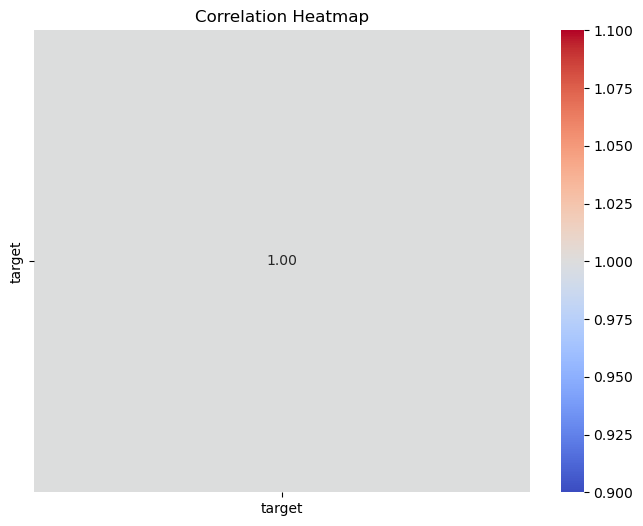

In [102]:
corr_matrix = group_num.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Prediction

In [103]:
# Extra libs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.svm import LinearSVC
#from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

pip install scikit-learn==1.1
pip install imbalanced-learn==0.9

#### 여기서 범주형 자료로 변환 들어가야 함

##### 범주형 변수 전처리 
* one-hot encoding : gender, enrolled_university, major_discipline, company_type,relevent_experience
* ordinal encoding : education_level, company_size, last_new_job
* object -> int : Experience: 수치화

In [104]:
# 모든 각 열에서의 unique한 value
for column in aug_train.columns:
    print(f"{column} unique values: \n{aug_train[column].unique()}\n")

enrollee_id unique values: 
[ 8949 29725 11561 ... 24576  5756 23834]

city_development_index unique values: 
[0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]

gender unique values: 
['Male' 'Other' 'Female']

relevent_experience unique values: 
['Has relevent experience' 'No relevent experience']

enrolled_university unique values: 
['No Enrollment' 'Full time course' 'Unknown' 'Part time course']

education_level unique values: 
['Graduate' 'Masters' 'High School' 'Unknown' 'Ph

##### scikit-learn 버전 출력
print(f"scikit-learn version: {sklearn.__version__}")
이 코드를 실행하여 scikit-learn의 버전을 확인하십시오. scikit-learn의 버전에 따라 OneHotEncoder의 매개변수 이름이 달라질 수 있습니다.

- 1.2.0 이상: sparse_output=False 사용
- 1.1.0 이하: sparse=False 사용

(버전 바꾸는 방법) 터미널에서 실행
-> pip uninstall scikit-learn -y
-> pip install scikit-learn==1.1.3


In [105]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.1.3


In [106]:
# One hot encoding 함수(dummy)
from sklearn.preprocessing import OneHotEncoder
## scikit-learn version: 1.4.2

In [107]:

def one_hot_encode_column(df, column_name):
    # OneHotEncoder 객체 생성
    # sparse_output=False
    encoder = OneHotEncoder(drop='first', sparse=False, dtype=int)
    # 해당 칼럼에 대해 OneHotEncoding 수행
    encoded_data = encoder.fit_transform(df[[column_name]])
    
    # 새로운 칼럼 이름 생성
    new_column_names = encoder.get_feature_names_out([column_name])
    
    # 새로운 칼럼 데이터프레임 생성
    encoded_df = pd.DataFrame(encoded_data, columns=new_column_names, index=df.index)
    
    # 기존 열 제거 및 새로운 열 추가
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(columns=[column_name], inplace=True)
    
    return df

In [108]:
aug_train = one_hot_encode_column(aug_train, 'gender')
aug_train = one_hot_encode_column(aug_train, 'enrolled_university')
aug_train = one_hot_encode_column(aug_train, 'major_discipline')
aug_train = one_hot_encode_column(aug_train, 'company_type')
aug_train = one_hot_encode_column(aug_train, 'relevent_experience')

aug_train.head()

,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,experience_under_1,experience_over_20,...,major_discipline_STEM,major_discipline_Unknown,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unemployed,company_type_Unknown,relevent_experience_No relevent experience
0,8949,0.920,Graduate,0,0,1,36,1,0,1,...,1,0,0,0,0,0,0,0,1,0
1,29725,0.776,Graduate,15,50-99,>4,47,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,11561,0.624,Graduate,5,Unemployed,Never,83,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,33241,0.789,Graduate,0,0,Never,52,1,1,0,...,0,0,0,0,0,0,1,0,0,1
4,666,0.767,Masters,0,50-99,4,8,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [109]:
aug_train.columns

Index(['enrollee_id', 'city_development_index', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'target', 'experience_under_1', 'experience_over_20',
       'experience_Unknown', 'count', 'gender_Male', 'gender_Other',
       'enrolled_university_No Enrollment',
       'enrolled_university_Part time course', 'enrolled_university_Unknown',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Unemployed', 'company_type_Unknown',
       'relevent_experience_No relevent experience'],
      dtype='object')

In [110]:
# Ordinal encoding 함수

def ordinal_encode_education_level(x):
    education_level_mapping = {'Primary School': 1, 'High School': 2, 'Graduate': 3, 'Masters': 4, 'Phd': 5, 'Unknown': 0}
    return education_level_mapping.get(x, x)

def ordinal_encode_company_size(x):
    company_size_mapping = {'<10': 1, '10-49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6, '5000-9999': 7, '10000+': 8, 'Unknown': 0, 'Unemployed': 9}
    return company_size_mapping.get(x, x)

def ordinal_encode_last_new_job(x):
    last_new_job_mapping = {'Never': 1, '1': 2, '2': 3, '3': 4, '4': 5, '>4': 6, 'Unknown': 0}
    return last_new_job_mapping.get(x, x)

# education_level 칼럼에 ordinal_encode_education_level 함수를 적용하여 변환
aug_train['education_level'] = aug_train['education_level'].apply(ordinal_encode_education_level)

# company_size 칼럼에 ordinal_encode_company_size 함수를 적용하여 변환
aug_train['company_size'] = aug_train['company_size'].apply(ordinal_encode_company_size)

# last_new_job 칼럼에 ordinal_encode_last_new_job 함수를 적용하여 변환
aug_train['last_new_job'] = aug_train['last_new_job'].apply(ordinal_encode_last_new_job)


In [111]:
# Unknown은 사실 ordinal에 들어가면 안되는데, 결측처리를 안했기 때문에 가지고 감
# 따라서 unknown인지 아닌지를 구분할 수 있는 더미칼럼을 생성

# 'education_level' 열을 기준으로 x가 0면 1, 아니면 0으로 'education_level_Unknown' 열 생성
aug_train['education_level_Unknown'] = aug_train['education_level'].apply(lambda x: 1 if x == 0 else 0)

# 'company_size' 열을 기준으로 x가 0이면 1, 아니면 0으로 'company_size_Unknown' 열 생성
aug_train['company_size_Unknown'] = aug_train['company_size'].apply(lambda x: 1 if x == 0 else 0)

# 'company_size' 열을 기준으로 x가 9이면 1, 아니면 0으로 'company_size_Unknown' 열 생성
aug_train['company_size_Unemployed'] = aug_train['company_size'].apply(lambda x: 1 if x == 9 else 0)

# 'last_new_job' 열을 기준으로 x가 0이면 1, 아니면 0으로 'last_new_job_Unknown' 열 생성
aug_train['last_new_job_Unknown'] = aug_train['last_new_job'].apply(lambda x: 1 if x == 0 else 0)

In [112]:
## 더미를 만드는 대신 원래 있던 열에서는 0값으로 변경(추가된 코드)
# 'education_level'가 0인 행의 'education_level'를 0로 변경
aug_train.loc[aug_train['education_level'] == 0, 'education_level'] = 0

# 'company_size'가 0인 행의 'education_level'를 0로 변경
aug_train.loc[aug_train['company_size'] == 0, 'company_size'] = 0

# 'company_size'가 9인 행의 'education_level'를 0로 변경
aug_train.loc[aug_train['company_size'] == 9, 'company_size'] = 0

# 'last_new_job'가 0인 행의 'last_new_job'를 0로 변경
aug_train.loc[aug_train['last_new_job'] == 0, 'last_new_job'] = 0

In [113]:
aug_train['company_size'] = aug_train['company_size'].astype(int)

In [114]:
print(aug_train['education_level'].unique())
print(aug_train['company_size'].unique())
print(aug_train['last_new_job'].unique())

[3 4 2 0 5 1]
[0 3 1 8 7 6 2 4 5]
[2 6 1 5 4 3 0]


In [115]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   enrollee_id                                 19158 non-null  int64  
 1   city_development_index                      19158 non-null  float64
 2   education_level                             19158 non-null  int64  
 3   experience                                  19158 non-null  int64  
 4   company_size                                19158 non-null  int64  
 5   last_new_job                                19158 non-null  int64  
 6   training_hours                              19158 non-null  int64  
 7   target                                      19158 non-null  int64  
 8   experience_under_1                          19158 non-null  int64  
 9   experience_over_20                          19158 non-null  int64  
 10  experience

In [116]:
aug_train[['company_size_Unemployed','company_type_Unemployed']].value_counts()

company_size_Unemployed  company_type_Unemployed
0                        0                          17447
1                        1                           1711
dtype: int64

In [117]:
aug_train.drop(columns='company_size_Unemployed',axis=1, inplace=True)

In [118]:
aug_train.columns

Index(['enrollee_id', 'city_development_index', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'target', 'experience_under_1', 'experience_over_20',
       'experience_Unknown', 'count', 'gender_Male', 'gender_Other',
       'enrolled_university_No Enrollment',
       'enrolled_university_Part time course', 'enrolled_university_Unknown',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Unemployed', 'company_type_Unknown',
       'relevent_experience_No relevent experience', 'education_level_Unknown',
       'company_size_Unknown', 'last_new_job_Unknown'],
      dtype='object')

##### 모델 전에 마지막 작업

In [119]:
aug_train = aug_train.drop(columns=['enrollee_id','count'], axis=1)

# Final look at our df
aug_train.head(3)

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,experience_under_1,experience_over_20,experience_Unknown,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unemployed,company_type_Unknown,relevent_experience_No relevent experience,education_level_Unknown,company_size_Unknown,last_new_job_Unknown
0,0.920,3,0,0,2,36,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.776,3,15,3,6,47,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0.624,3,5,0,1,83,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [120]:
# model 돌리기 전에 최종 데이터 셋 정보
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      19158 non-null  float64
 1   education_level                             19158 non-null  int64  
 2   experience                                  19158 non-null  int64  
 3   company_size                                19158 non-null  int64  
 4   last_new_job                                19158 non-null  int64  
 5   training_hours                              19158 non-null  int64  
 6   target                                      19158 non-null  int64  
 7   experience_under_1                          19158 non-null  int64  
 8   experience_over_20                          19158 non-null  int64  
 9   experience_Unknown                          19158 non-null  int64  
 10  gender_Mal

# Modelling

In [121]:
from sklearn.model_selection import train_test_split

X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

# train, val, test 셋 분리하는 코드
# 데이터셋 분할: Train/Validation + Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
# 데이터셋 분할: Train + Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=80)

In [122]:
# 열 이름 설정
feature_columns = aug_train.drop(columns=['target']).columns
target_column = ['target']

# numpy 배열을 DataFrame으로 변환
X_train_df = pd.DataFrame(X_train_val, columns=feature_columns)
X_val_df = pd.DataFrame(X_val, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)
y_train_df = pd.DataFrame(y_train_val, columns=target_column)
y_val_df = pd.DataFrame(y_val, columns=target_column)
y_test_df = pd.DataFrame(y_test, columns=target_column)

# Ensure 'train_df' and 'test_df' are created correctly by concatenating X and y
# train_df : for visuals
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_val_df, y_val_df], axis=1)
new_data_df = pd.concat([X_test_df, y_test_df], axis=1)

# 출력 확인 
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   city_development_index                      15326 non-null  float64
 1   education_level                             15326 non-null  float64
 2   experience                                  15326 non-null  float64
 3   company_size                                15326 non-null  float64
 4   last_new_job                                15326 non-null  float64
 5   training_hours                              15326 non-null  float64
 6   experience_under_1                          15326 non-null  float64
 7   experience_over_20                          15326 non-null  float64
 8   experience_Unknown                          15326 non-null  float64
 9   gender_Male                                 15326 non-null  float64
 10  gender_Oth

In [123]:
X_train, X_test, y_train, y_test = X_train, X_val, y_train, y_val

-> 여기까지가 (윤지)가 정리한 코드고, 이 밑에부터는 아예 안 건들렸어!
- random state을 동일하게 유지한 상태에서 위에서 (for visual)하기 위해 돌렸던 코드를 
- 명목형 자료까지도 전처리한 후에 여기서 다시 동일하게 나눴을 뿐!! 

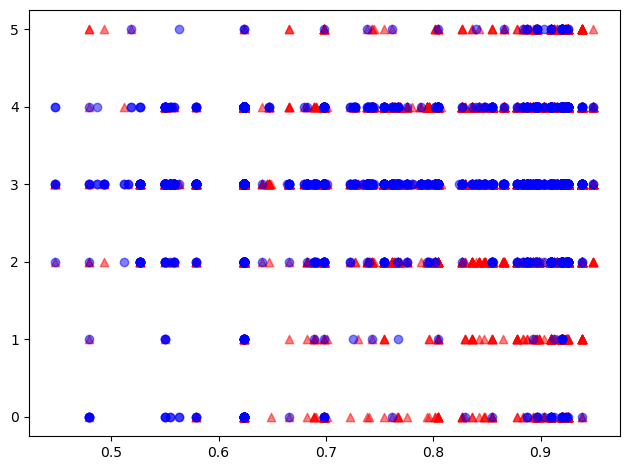

In [131]:
import matplotlib.pyplot as plt
X, y = X_train, y_train

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

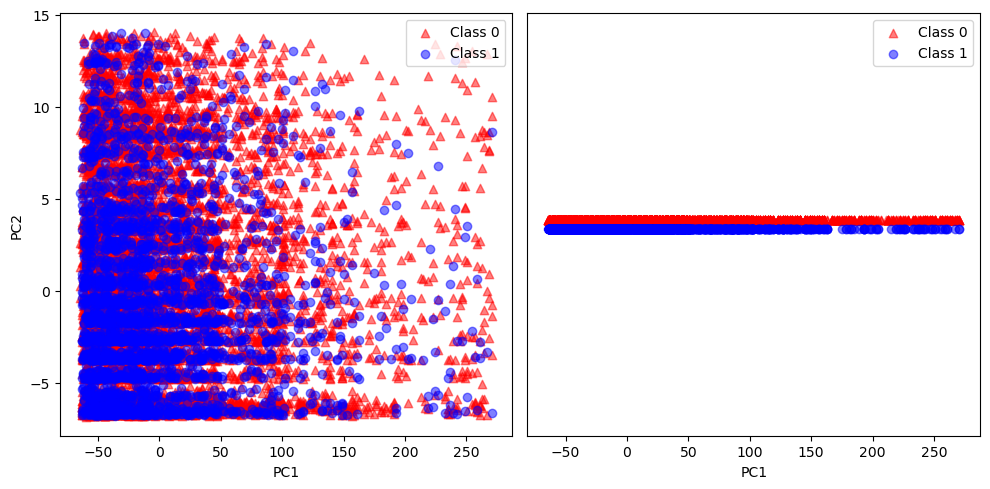

In [127]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA 적용
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

# 그래프 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 첫 번째 그래프
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5, label='Class 0')
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5, label='Class 1')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].legend()

# 두 번째 그래프
ax[1].scatter(X_spca[y == 0, 0], np.zeros(len(X_spca[y == 0, 0])) + 0.02,
              color='red', marker='^', alpha=0.5, label='Class 0')
ax[1].scatter(X_spca[y == 1, 0], np.zeros(len(X_spca[y == 1, 0])) - 0.02,
              color='blue', marker='o', alpha=0.5, label='Class 1')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[1].legend()

plt.tight_layout()
plt.show()


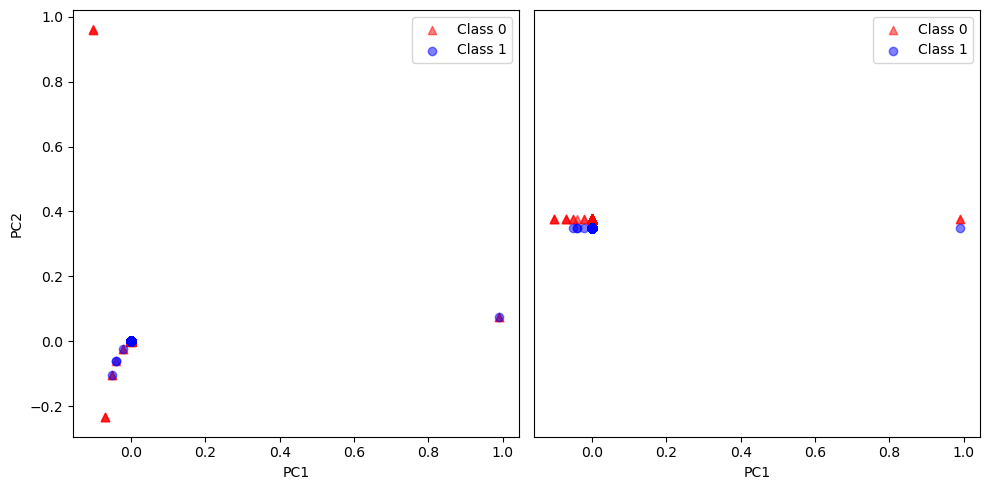

In [128]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
import numpy as np

# Kernel PCA 적용
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

# 그래프 설정
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# 첫 번째 그래프
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5, label='Class 0')
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5, label='Class 1')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].legend()

# 두 번째 그래프
ax[1].scatter(X_kpca[y == 0, 0], np.zeros(len(X_kpca[y == 0, 0])) + 0.02,
              color='red', marker='^', alpha=0.5, label='Class 0')
ax[1].scatter(X_kpca[y == 1, 0], np.zeros(len(X_kpca[y == 1, 0])) - 0.02,
              color='blue', marker='o', alpha=0.5, label='Class 1')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[1].legend()

plt.tight_layout()
plt.show()
